<a href="https://colab.research.google.com/github/Frutta111/ML-Algorithms-on-MNIST/blob/main/Part_A_PLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PART A: Perceptron Learning Algorithm (PLA)**

# **Getting our depnedncies (and data!)**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import time

## Import our relevant libraries

##Fetch MNIST Dataset
The MNIST dataset serves as a cornerstone in the domain of digit classification. It comprises a collection of 28x28 pixel grayscale images, each depicting a handwritten digit (0 through 9). Originating from the National Institute of Standards and Technology (NIST).
Key Characteristics of MNIST:
- **Image Size:** Each image is 28 pixels in height and 28 pixels in width, resulting in a total of 784 pixels per image.
- **Grayscale Images**: The images are grayscale, with each pixel represented by a single intensity value ranging from 0 (black) to 255 (white).
- **Handwritten Digits**: The dataset primarily consists of handwritten digits, introducing variations in writing styles, slants, and sizes.
- **Labeling**: Each image is associated with a label (digit from 0 to 9), creating a ten-class classification problem.

In [ ]:
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#EDA -  **Exploratory Data Analysis**

*   As we expected, the data contains 7,000 records with 784 columns of pixels and one variable which is the label.
*   There are no identical records in the data
*   There are columns (pixels) that contain missing values, mainly at the edges. that
There are columns (pixels) mainly at the edges of the image that are empty (missing values). In these cells the intensity value is zero

*   There are no null values ​​for the label variable
*   There are an average of 7,000 records per digit. Number 1 has the most records (7,877) and number 5 has the fewest (6,313)




















Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel_0 to label
dtypes: category(1), float64(784)
memory usage: 418.8 MB
None

First few rows of the dataset:
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0      NaN      NaN  ...        NaN        NaN        NaN        NaN   
1      NaN      NaN  ...        NaN        NaN        NaN        NaN   
2      NaN      NaN  ...        NaN        NaN        NaN        NaN   
3      NaN      NaN

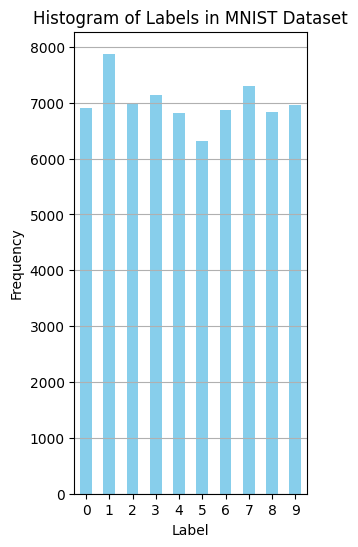

In [ ]:
import pandas as pd
# Convert the data to a DataFrame for better analysis
data = pd.DataFrame(X, columns=[f"pixel_{i}" for i in range(X.shape[1])])
data['label'] = y

# Display basic information about the dataset
print("Dataset information:")
print(data.info())

# Display basic statistics about the features
# print("\nBasic statistics about the features:")
# print(data.describe())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Count NaN values in each column
print("\nCount NaN values in each column")
print(data.isna().sum())

# Check for duplicate rows
duplicate_rows = data[data.duplicated(keep=False)]

# Display duplicate rows if there are any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)

# Show value counts of the labels
print("\nValue counts of labels:")
print(data['label'].value_counts())

# Calculate the average counts of each label
average_counts = data['label'].value_counts().mean()
print(f"\nThe average counts of each label is: {average_counts}")

# Convert labels to a Pandas Series
labels = pd.Series(y, name='Labels')

# Plot histogram
plt.figure(figsize=(3, 6))
labels.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Labels in MNIST Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Summary statistics of NaN counts
# nan_summary_stats = nan_counts.describe()


#**Data Preparation**

##Data Partitioning
Divide the original MNIST dataset into two subsets: a training set containing 60,000 images and a test set containing 10,000 images. The 'train_test_split' function from the scikit-learn module can be employed for this purpose.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
print ("The size of X_train is:", X_train.shape)
print ("The size of X_test is:", X_test.shape)

The size of X_train is: (60000, 784)
The size of X_test is: (10000, 784)


##Label and Image Transformation
**One-Hot Vector Representation**: transform the digit labels into one-hot vectors. Each label, such as '5', will be represented as [0,0,0,0,0,1,0,0,0,0], and '0' will correspond to [1,0,0,0,0,0,0,0,0,0].



In [ ]:
labels_train = y_train.astype(int)
labels_test = y_test.astype(int)

# Number of classes (digits 0-9)
num_classes = 10

# Transform labels to one-hot vectors
one_hot_labels_train = np.zeros((len(labels_train), num_classes))
one_hot_labels_train[np.arange(len(labels_train)), labels_train] = 1

one_hot_labels_test = np.zeros((len(labels_test), num_classes))
one_hot_labels_test[np.arange(len(labels_test)), labels_test] = 1

print(one_hot_labels_train[:5])
# print(labels_train[:5])
# print(one_hot_labels_test[:5])
# print(labels_test[:5])
#print(np.argmax(one_hot_labels_train, axis=1)[0:4])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


**Flattening Images**: Flatten the input images to create a vector representation. Each original image, initially of size 28x28 pixels, should be transformed into a vector of size 785x1. The first component of this vector represents the bias term and is set to 1.

In [ ]:
# Flattening input images and adding bias term
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
image_size = X_train.shape[1]  # Image size before flattening (28x28 = 784 pixels)

# Flatten training set
X_train_flattened = np.c_[np.ones((num_samples_train, 1)), X_train]  # Add bias term (column of 1s)
X_train_flattened = X_train_flattened.reshape(num_samples_train, image_size + 1)  # Reshape to 785x1

# Flatten test set
X_test_flattened = np.c_[np.ones((num_samples_test, 1)), X_test]  # Add bias term (column of 1s)
X_test_flattened = X_test_flattened.reshape(num_samples_test, image_size + 1)  # Reshape to 785x1

# Display the shape of the flattened datasets
print("Flattened Training Data Shape:", X_train_flattened.shape)
print("Flattened Test Data Shape:", X_test_flattened.shape)

# Check if the vector contains NaN
has_na = np.isnan(X_train_flattened).any()
if has_na:
    print("contains NaN values")
else:
    print("does not contain NaN values")

Flattened Training Data Shape: (60000, 785)
Flattened Test Data Shape: (10000, 785)
does not contain NaN values


#PART A: Perceptron Learning Algorithm (PLA)
The Perceptron Learning Algorithm (PLA) is used    for binary classification.
In cases where the data is not linearly separable, the PLA algorithm will never terminate and can exhibit unstable behavior. To address this challenge and obtain an approximate solution, a modification known as the pocket algorithm is introduced.
The pocket algorithm serves to enhance the stability and performance of PLA by maintaining, or keeping 'in its pocket,' the best weight vector encountered up to iteration t during the PLA process. Throughout the iterations, the algorithm evaluates the performance of the current weight vector against the one stored in its pocket.

- Label vector: Binary label vector, Assign the label +1 to label the target and -1 otherwise.
- Bias term: First column of Feature matrix must be a vector represents the bias term and is set to 1.
- Weight update is done by serially going over the data until finding an example that was not classified correctly
- Methodology to suit the general case:  Pocket algorithm
- Loss function is One Zero Loss



##Binary PLA classifier

In [ ]:
class Perceptron1:
    def __init__(self, num_features, num_epochs=10 ):
        self.weights = np.zeros(num_features)  # Initialize weigts to 0, temporary weights
        self.num_epochs = num_epochs
        self.E_in_epochs = np.ones((num_epochs, 2), dtype=float)  #column0: E_in PLA algorithm , column1: E_in Pocket algorithm
        self.E_out_epochs = np.ones((num_epochs, 2), dtype=float) #column0: E_out PLA algorithm , column1: E_out Pocket algorithm

        # Pocket Algorithm - elemtns to keep in pocket
        self.pocket_e_in = 1
        self.pocket_weights = np.zeros(num_features)
        self.pocket_e_out = 1

    def predict(self, X):
        activation = X @ self.weights
        # Apply the condition: 1 if greater than or equal to 0, else -1
        prediction = (activation > 0) * 1
        prediction[prediction == 0] = -1
        return prediction  # Return the prediction

    def loss(self, y_pred, y_true):
          correct = y_pred * y_true
          correct = correct > 0
          loss = 1 - np.mean(correct)  # Calculate 1-ACC
          return loss

    def train(self, X_train, y_train, X_test, y_test):
        epoch = 0
        while epoch < self.num_epochs:
            prediction = self.predict(X_train)
            e_in = self.loss(prediction, y_train)

            # needed for Performance Visualization: calculate test loss
            prediction_test = self.predict(X_test)
            e_out = self.loss(prediction_test, y_test)

            #  Update Pocket if e_in is smaller
            if e_in < self.pocket_e_in:
                self.pocket_e_in = e_in
                self.pocket_weights = np.copy(self.weights)
                self.pocket_e_out = e_out

            # needed for Performance Visualization: Save train and test losses as a function of the iteration index
            self.E_in_epochs[epoch,0] = e_in
            self.E_in_epochs[epoch,1] = self.pocket_e_in
            self.E_out_epochs[epoch,0] = e_out
            self.E_out_epochs[epoch,1] = self.pocket_e_out

            # Update weights for the next iteration
            incorrect_index = np.where(prediction * y_train < 0)[0] #Index list of misclassified instances
            if len(incorrect_index) > 0:
                self.weights += y_train[incorrect_index[0]] * X_train[incorrect_index[0]]
            else:
                break  # Break the loop if all points are classified correctly

            epoch += 1

        # print("train loss (E_in):", self.pocket_e_in)
        # print("test loss (E_out):", self.pocket_e_out)
        # print("Accuracy (ACC): ", 1 - self.pocket_e_out)

        return  self.pocket_weights, self.E_in_epochs ,self.E_out_epochs

###PLA Binary Classification Setup and Model Evaluation

**This section is not required to mmn11.
In this section I ran the PLA binary classification algorithm using the POCKET method on the data. Training is done by 100 iterations just to get an initial feeling and correctness of the algorithm.**

Actions performed in the following code snippet:

  1.   Prepare label vector: binary classifier to distinguish between the '0' class and all other classes. We assign the label +1 to examples labeled '0' and -1 to examples labeled '1', '2', ..., '9'. The weight vector obtained from this classification is denoted as 𝑤0.
  2.   Set parameters and call function Perceptron1
  3.   Present Confusion Matrix and evaluation metrics for each digit calculated on the test data
  4.   Visualize training (E_in) and test (E_out) losses on the same graph as a function of the iteration index.






In [ ]:
from sklearn.metrics import confusion_matrix

# This function call function Perceptron1 for binary classification and does Model Evaluation
# You should set class_number (digit) and  num_epochs

def model_evaluation(X_train, y_train, X_test, y_test, digit, num_epochs=10 ):

      # Setup parameters for perceptron1
      num_features = X_train.shape[1]
      num_class = y_train.shape[1]

      # Create an instance of the Perceptron class
      perceptron = Perceptron1(num_features, num_epochs)

      # Train the perceptron and get the pocket weights and pocket e_in
      pocket_weights, E_in , E_out = perceptron.train(X_train, y_train[:,digit], X_test, y_test[:,digit])
      # print(E_in)

      # Calculate test prediction
      y_pred = perceptron.predict(X_test)
      y_true = y_test[:,digit]

      # Create confusion matrix
      conf_matrix = confusion_matrix(y_true, y_pred)

      # Calculate metrics: Accuracy, TPR, TNR
      total = np.sum(conf_matrix)
      accuracy = np.trace(conf_matrix) / float(total) # ACC = (TP + TN) / (TP + TN + FP + FN)
      tpr = conf_matrix[1, 1] / float(np.sum(conf_matrix[1, :])) # TPR = TP / (TP + FN)
      tnr = conf_matrix[0, 0] / float(np.sum(conf_matrix[0, :])) # TNR = TNR = TN / (TN + FP)

      # Plot side by side
      plt.figure(figsize=(18, 6))  # Adjust figsize as needed

      # Plot confusion matrix using seaborn heatmap
      plt.subplot(1, 3, 1)  # Adjust the number of subplots as needed (1 row, 3 columns)
      sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                  xticklabels=['Class 0', 'Class 1'],
                  yticklabels=['Class 0', 'Class 1'])
      plt.xlabel('Predicted')
      plt.ylabel('True')
      #plt.title('Confusion Matrix (Counts)')
      plt.title(f'Confusion Matrix (Counts) for Digit {digit}\nNumber of Epochs = {num_epochs}\nAccuracy={accuracy:.2f}, TPR={tpr:.2f}, TNR={tnr:.2f}')
      #plt.show()

      # Performance Visualization: Visualize training and test losses on the same graph as a function of the iteration index
      plt.subplot(1, 3, 2)  # Adjust the number of subplots as needed (1 row, 3 columns)

      # Plotting the losses on the same graphs
      plt.plot(E_in[:, 1], label='POCKET E_in', color='blue')  # Plot E_in's second column
      plt.plot(E_out[:, 1], label='POCKET E_out', color='red')  # Plot E_out's second column
      # plt.plot(E_in[:, 0], label='PLA E_out', color='green')  # Plot E_in's first column
      # plt.plot(E_out[:, 0], label='PLA E_out', color='orange')  # Plot E_out's first column


      # Set plot labels and title
      plt.xlabel('Iteration Number')
      plt.ylabel('Errors')
     # plt.title(f'Losses  for  digit {digit}\nNumber of Epochs = {num_epochs}\nPOCKET E_in={E_in[-1,1]:.3f} , POCKET E_out={E_out[-1,1]:.3f}\nPLA E_in={E_in[-1,0]:.3f} , PLA E_out={E_out[-1,0]:.3f}')
      plt.title(f'Losses  for  digit {digit}\nNumber of Epochs = {num_epochs}\nPOCKET E_in={E_in[-1,1]:.3f} , POCKET E_out={E_out[-1,1]:.3f}')

      plt.legend()  # Show legend
      #plt.show()

      # Plotting a sample image
      y = one_hot_labels_test
      x = X_test_flattened

      # Find the first index of digit '1'
      digit_index = np.where(y[:,digit] >0)[0][0] #First index list of misclassified instances
      #print(digit_index)

      # Get the image data of the first occurrence of digit '1'
      image = x[digit_index,1:785].reshape(28, 28)  # Reshape to 28x28 pixels

      plt.subplot(1, 3, 3)  # Adjust the number of subplots as needed (1 row, 3 columns)
      # Display the image

      plt.imshow(image, cmap='binary')
      plt.axis('off')  # Hide axis labels and ticks
      plt.title(f"Sample Image of Digit '{digit}'")

      plt.tight_layout()
      plt.show()



###PLA Binary Classification - Conclusions:

1) The  algorithm runs in a reasonable time of 57 seconds for 100 iterations and gives good classification results

2) For each of the digits the accuracy index (ACC) and the TNR is very high. This is not surprising since the percentage of registrations for each digit is only 10%.

3) The digits for which the model worked less well compared to the others are: 4, 5, 8, 9 with a TPR of 0.68, 0.49, 0.34, 0.78 respectively
It is possible that if we had increased the iterations in the training the metrics would have improved.

4) For each of the digits the value of the loss function (LOSS) is very low and stands at less than 8% in both the training observations and the test observations. The downward trend can be seen as a function of the iteration number

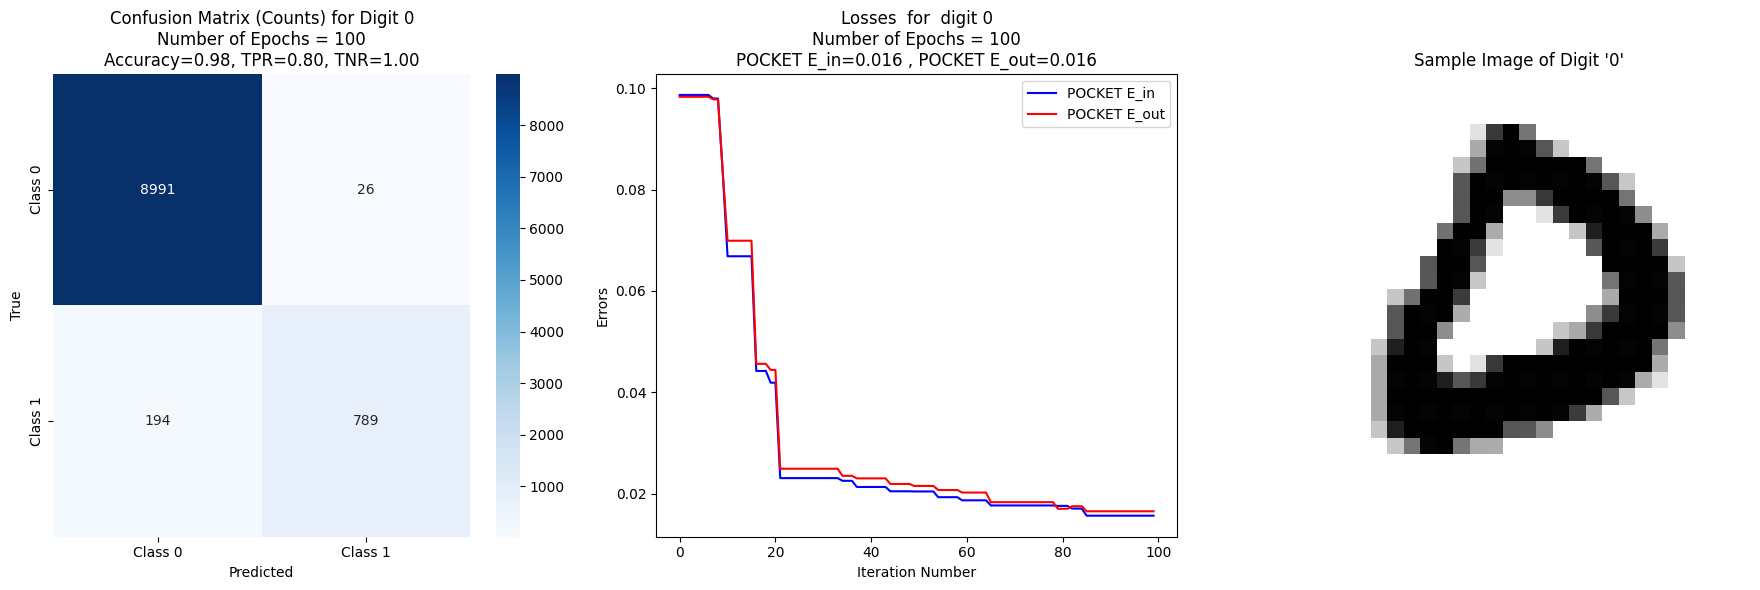

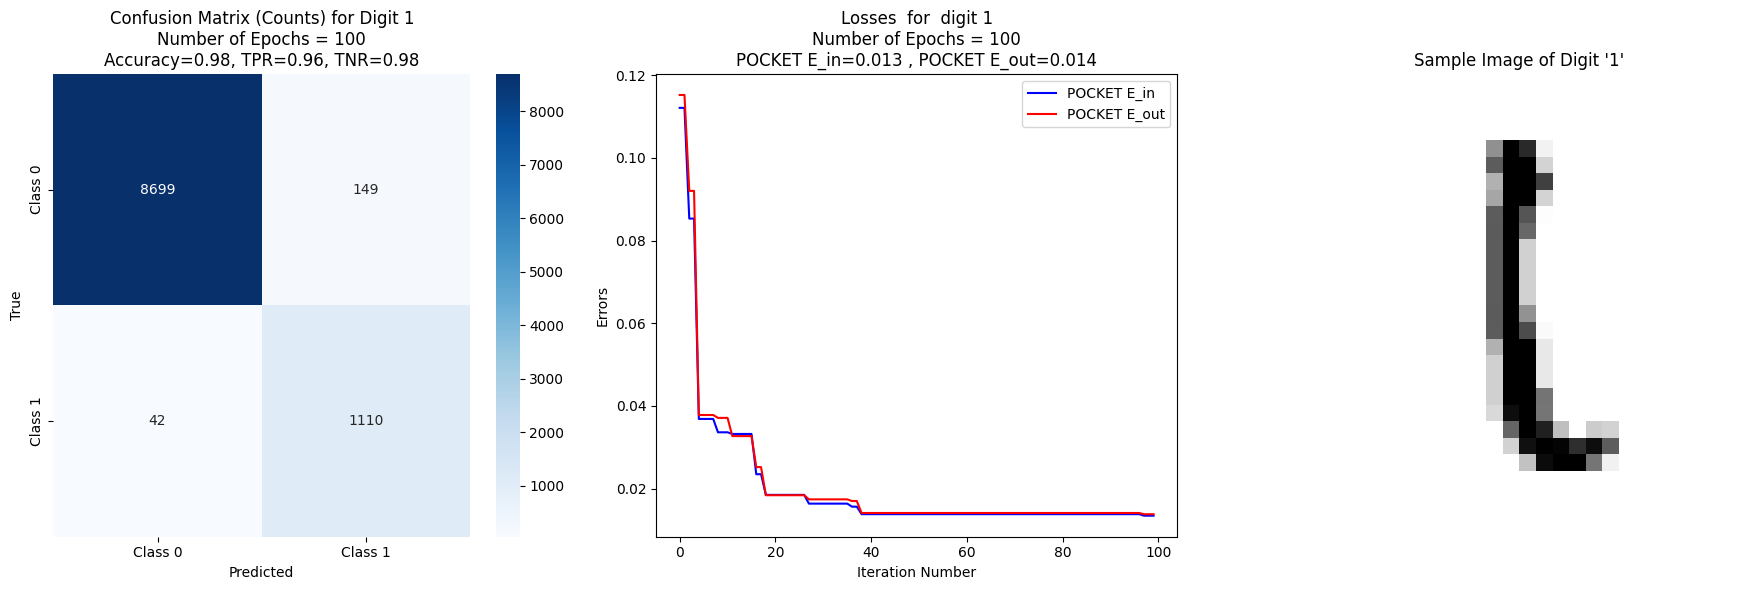

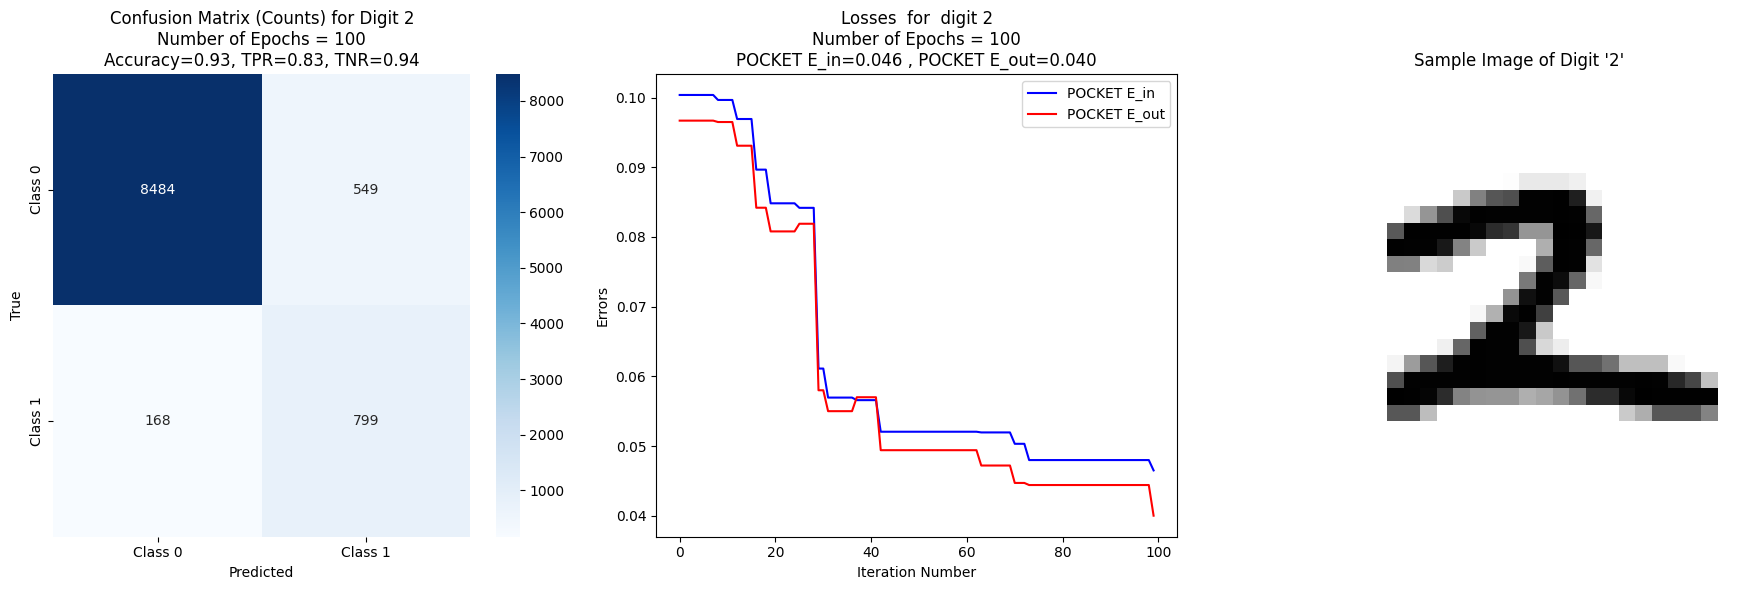

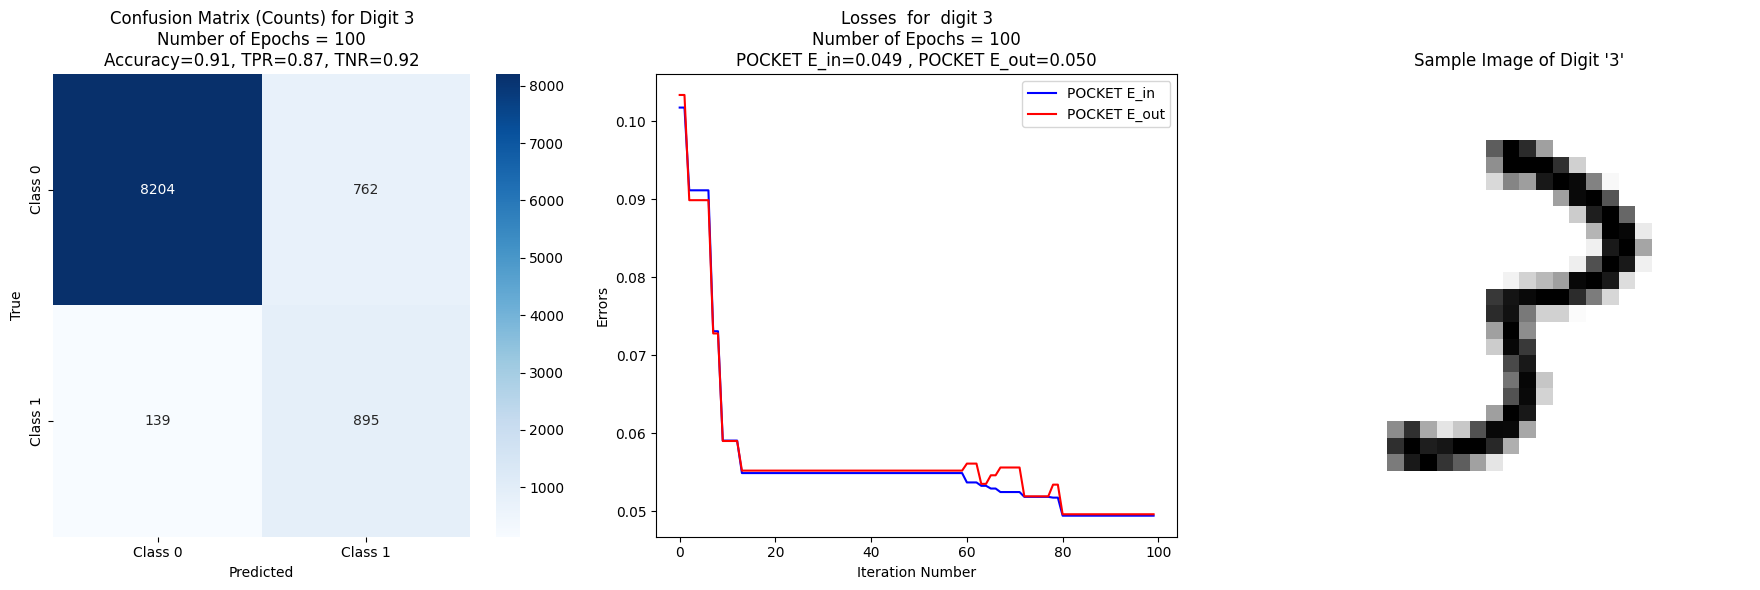

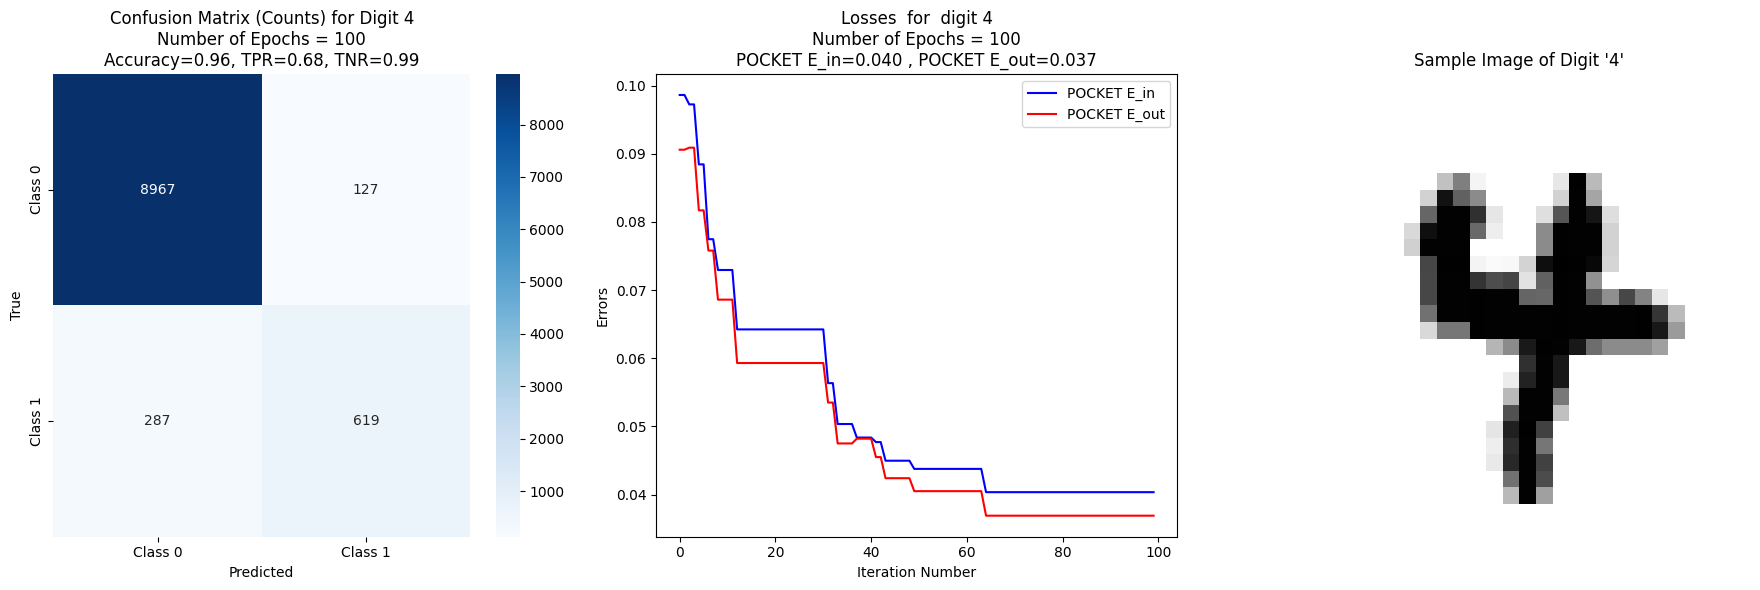

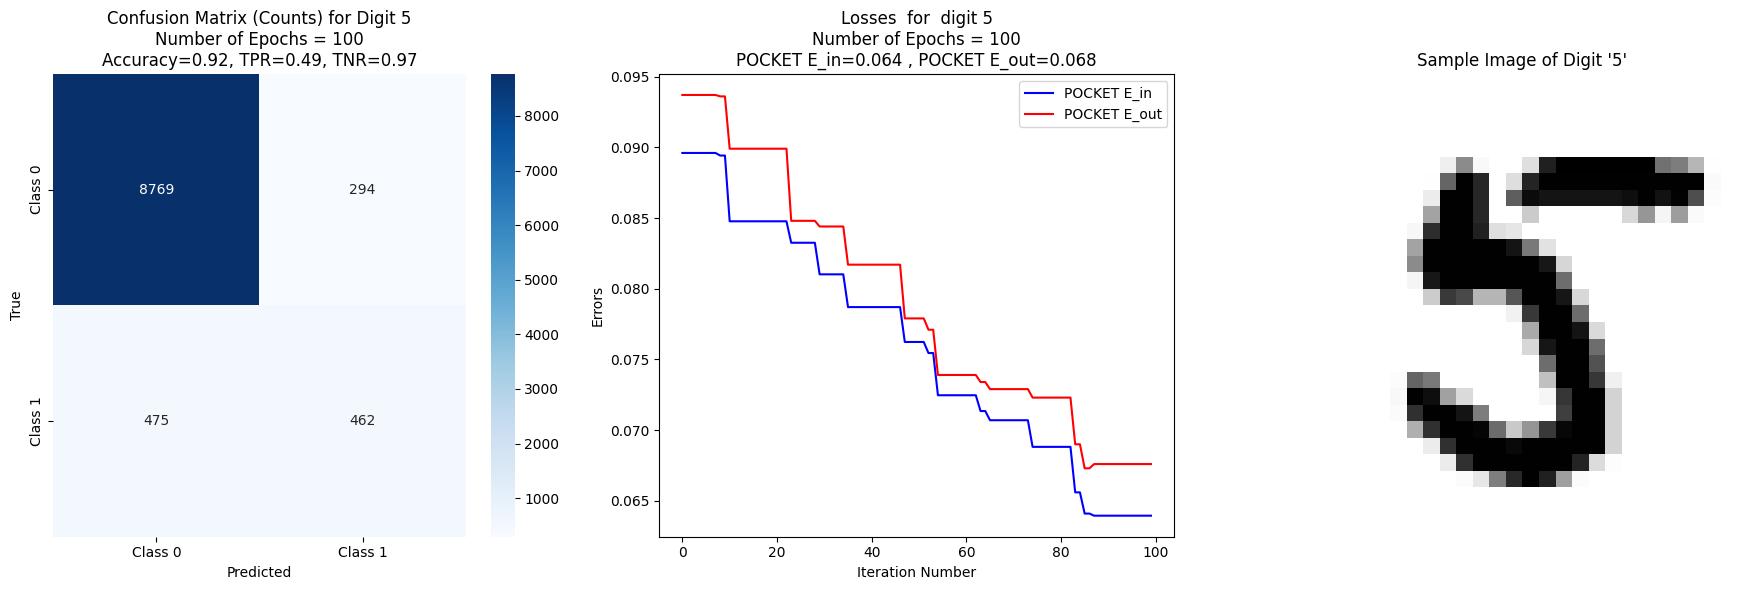

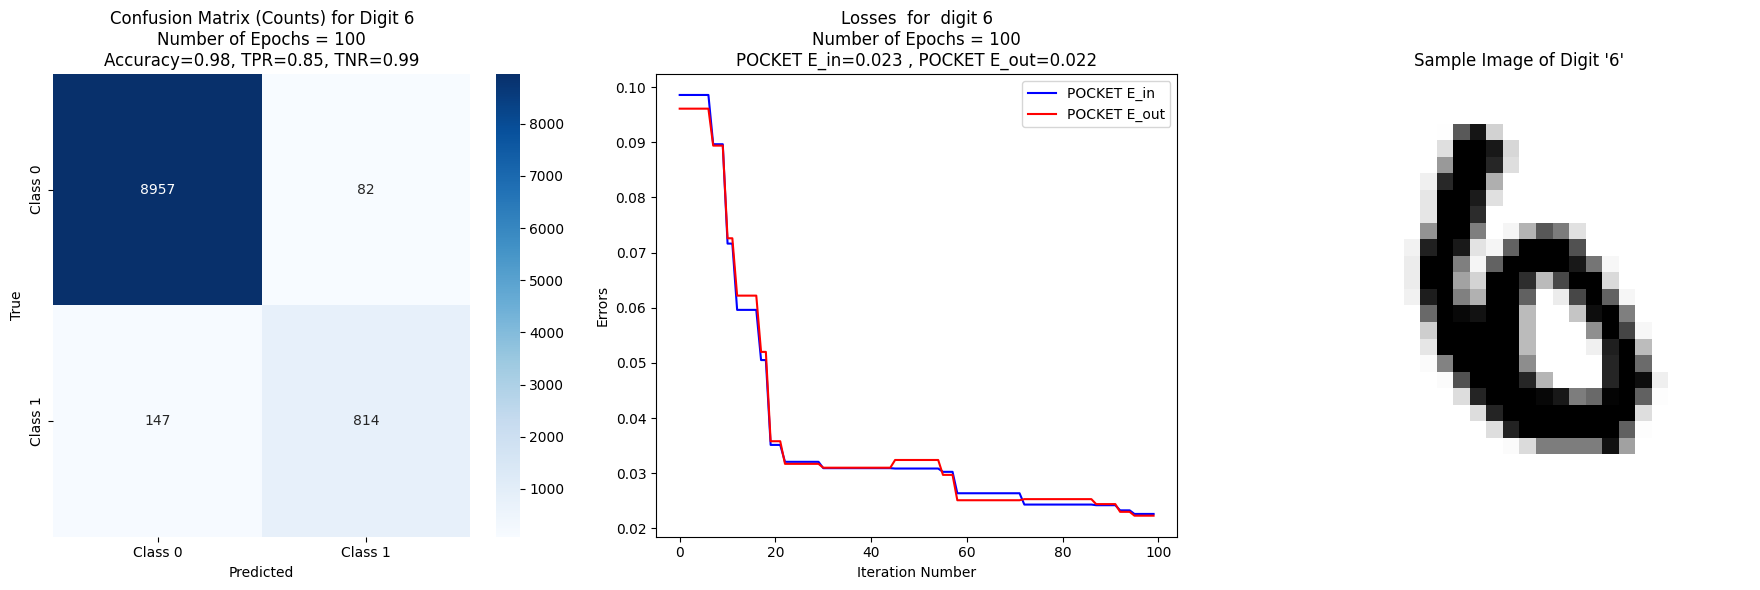

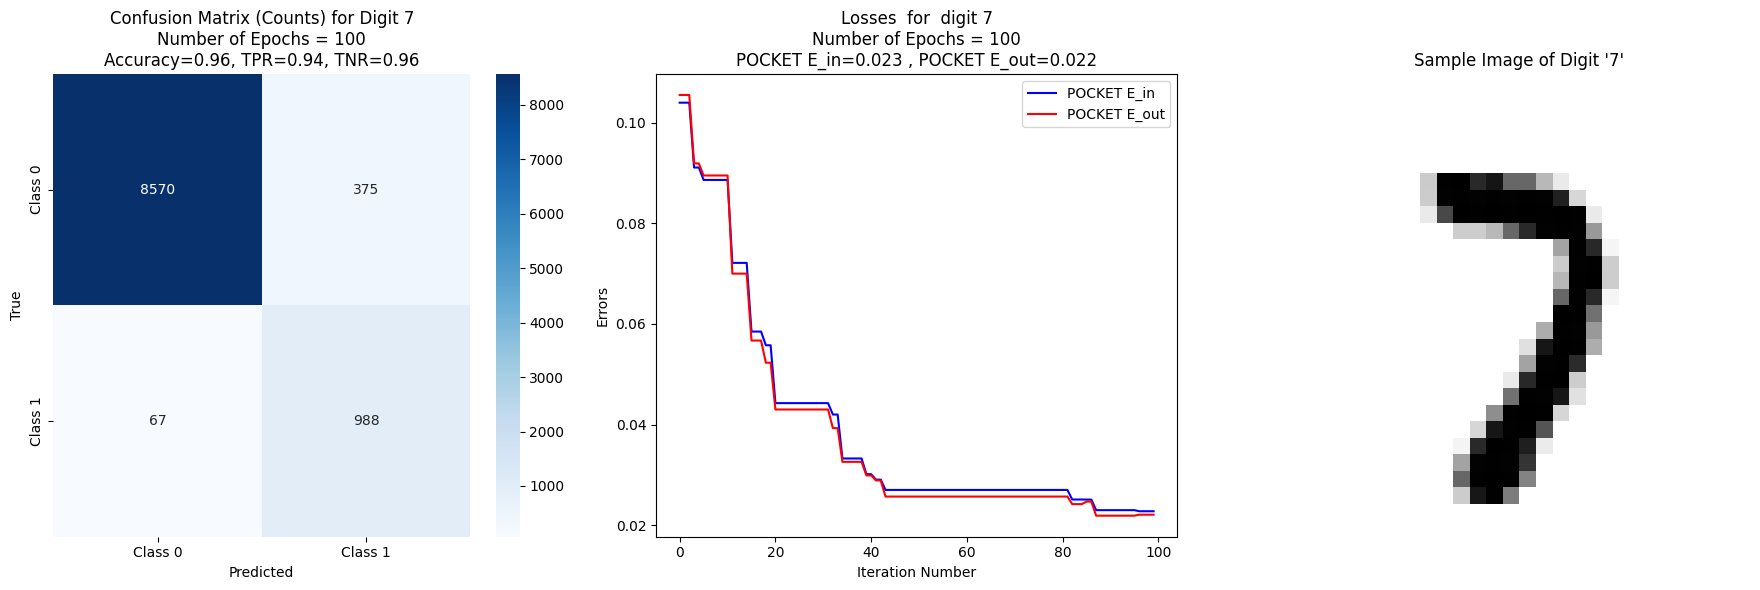

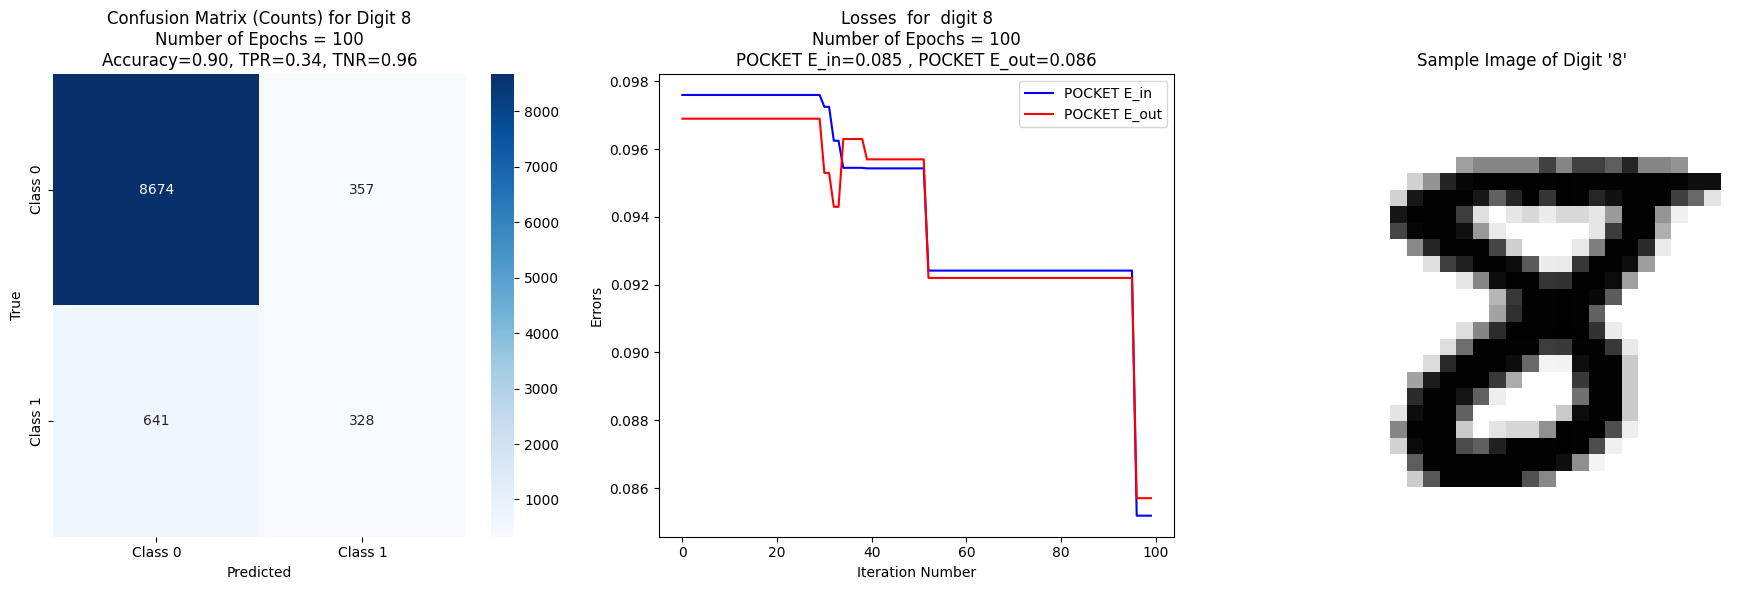

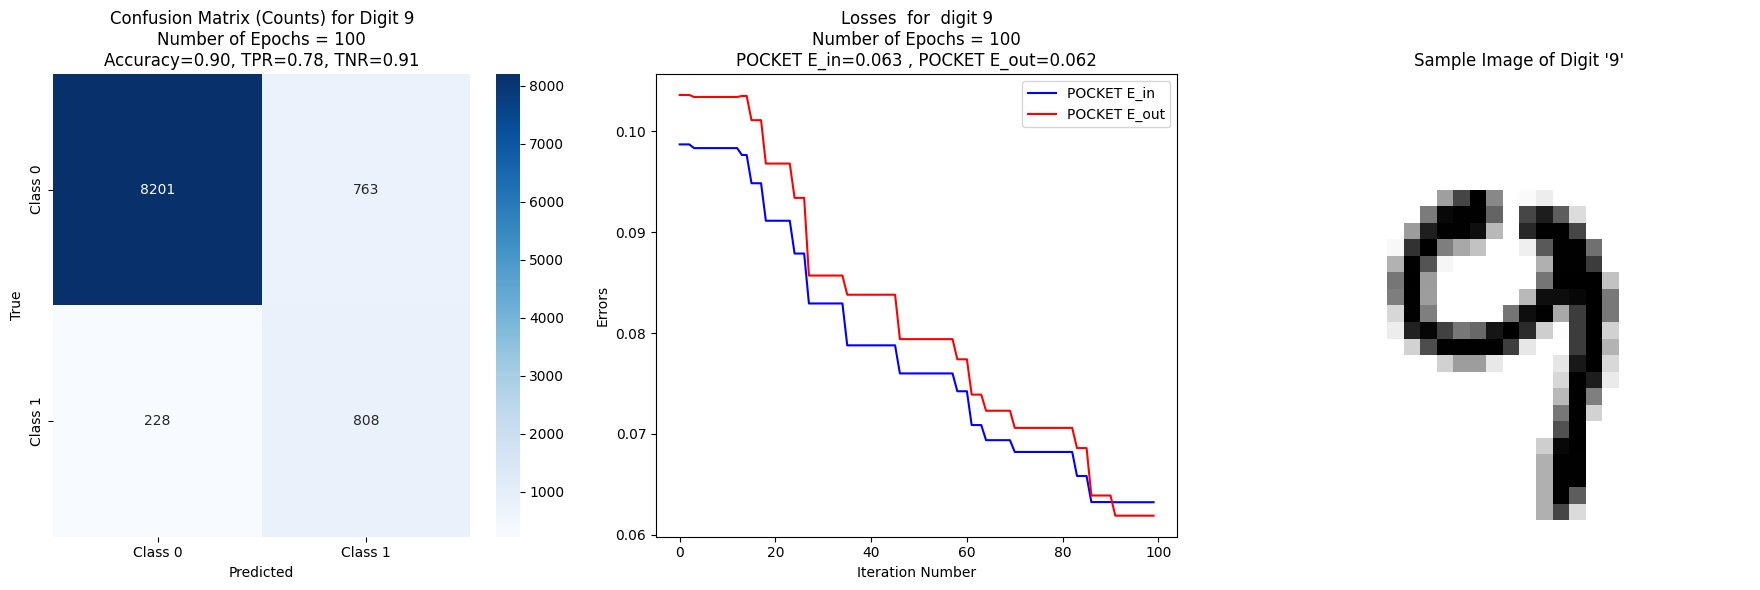

Elapsed time: 57.322556018829346 seconds


In [ ]:
# Transform labels
y_train_pla = np.copy(one_hot_labels_train)
y_test_pla = np.copy(one_hot_labels_test)

y_train_pla[y_train_pla == 0] = -1
y_test_pla[y_test_pla == 0] = -1

start_time = time.time() # Record the start time

# call PLA algorithm
for digit in range(0, 10):
  model_evaluation(X_train_flattened, y_train_pla, X_test_flattened, y_test_pla, digit, num_epochs=100 )

end_time = time.time() # Record the end time
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"Elapsed time: {elapsed_time} seconds") # Print the elapsed time


## **Multi-Class PLA Classification**

To extend PLA binary classifier application to multi-class classification, we employ the **one-vs-all strategy**. This strategy involves training multiple binary PLA classifiers, each dedicated to distinguishing one class from the rest. In this approach, the multi-class problem is reduced to K binary problems, where K is the number of classes.

The process involves the following stages:

**Binary Classification Setup:**
In the first stage, we create a binary classifier to distinguish between the '0' class and all other classes. We assign the label +1 to examples labeled '0' and -1 to examples labeled '1', '2', ..., '9'. The weight vector obtained from this classification is denoted as 𝑤0.
For more details on PLA for binary classification - see previous chapter

**Iterative Binary Problems:**
For each binary problem i from 1 to 9, we assign the label +1 to examples labeled 'i' and -1 to examples labeled '0', '1', '2', ..., '9' (excluding 'i'). The weight vectors resulting from these binary classifications are denoted as 𝑤0,𝑤1,…,𝑤9.

**Prediction**
For a new instance x, the prediction of the label is determined by selecting the class with the highest confidence score: 𝑦̂=𝑎𝑟𝑔𝑚𝑎𝑥𝑦∈{0,…,9}𝑤𝑦𝑥 . In this expression, 𝑦̂ represents the predicted label, and 𝑤𝑦𝑥 signifies the confidence score associated with class 𝑦. The argmax operation identifies the class for which the confidence score is maximized, resulting in the predicted label for the given instance 𝑥.





**Explanation of "Perspectron Package"**

The function allows to train a PLA model for multi-class classification. In addition, it allows you to run the model on new samples and calculate metrics to test the classification performance. For information about the functions - see comments in the body of the code. Below is an explanation of the outputs by order,

1) *pocket_weights* - The matrix of the final weights. Each column in the matrix is ​​a vector of weights dedicated to distinguishing one class from all the others. For our problem, we end up with K=10 weight vectors 𝑤0,𝑤1,…,𝑤9, so that the matrix dimensions are 785 X 10

2) *E_in_b_per_digit , E_out_b_per_digit* -  Train and test losses for each digit (binary classification method) which are calculated in each iteration

3) *E_in_m_overall , E_out_m_overall* - Train and test losses for the multi-class classification which are calculated in each iteration

4) *E_in_m_per_digit , E_out_m_per_digit* - Train and test losses for the multi-class classification perfomance in distinguishing individual digits which are calculated in each iteration

In [ ]:
class Perceptron:
    def __init__(self, num_features, num_classes, num_epochs=10 ):
        self.num_epochs = num_epochs
        self.num_classes = num_classes
        self.weights = np.zeros((num_features, num_classes), dtype=float)  # Initialize weigts to 0, temporary weights

        # Pocket Algorithm - elemtns to keep in pocket
        self.pocket_weights = np.zeros((num_features, num_classes), dtype=float)
        self.pocket_e_in = np.ones((num_classes), dtype=float)
        self.pocket_e_out = np.ones((num_classes), dtype=float)

        # Train and test prediction losses for each digit (binary classification method)
        self.E_in_b_per_digit = np.ones((num_epochs, num_classes), dtype=float) # "b" for binary classification method
        self.E_out_b_per_digit = np.ones((num_epochs, num_classes), dtype=float) # "b" for binary classification method

        # Multi_class train and test prediction losses - overall
        self.E_in_m_overall = np.ones((num_epochs), dtype=float) # "m" for multi class classification method
        self.E_out_m_overall = np.ones((num_epochs), dtype=float) # "m" for multi class classification method

        # Multi_class train and test prediction losses - for each digit
        self.E_in_m_per_digit = np.ones((num_epochs, num_classes), dtype=float) # "m" for multi class classification method
        self.E_out_m_per_digit = np.ones((num_epochs, num_classes), dtype=float) # "m" for multi class classification method

    def predict_b(self, X ): #predict_b - "b" for prediction (output) is boolean +-1
        activation = X @ self.weights
        # Apply the condition: 1 if greater than or equal to 0, else -1
        prediction = (activation > 0) * 1
        prediction[prediction == 0] = -1
        return prediction  # Size of prediction is num_samples X num_classes

    def loss_b(self, y_pred, y_true): #loss_b - "b" for y_pred (input) is boolean +-1
          correct = y_pred * y_true
          correct = correct > 0
          loss = 1 - np.mean(correct, axis=0)  # Calculate 1-ACC
          return loss

    def predict(self, X): # use pocket_weights to calculate multi_class_prediction
          activation = X @ self.pocket_weights
          multi_class_prediction =  np.argmax(activation, axis=1)
          return multi_class_prediction

    def overall_loss(self, y_pred_multi, y_true): #calculate overall loss
          y_true_multi = np.argmax(y_true, axis=1)
          correct = (y_pred_multi == y_true_multi).astype(int)
          loss = 1 - np.mean(correct)  # Calculate 1-ACC
          return loss

    def per_digit_loss(self, y_pred_multi, y_true):  #calculate per digit loss
          num_samples = len(y_pred_multi)
          y_pred = np.zeros((num_samples, self.num_classes))
          y_pred[np.arange(num_samples), y_pred_multi] = 1
          y_pred[y_pred == 0] = -1
          correct = y_pred * y_true
          # correct = np.where(y_pred == y_true01, 1, 0) / num_samples
          loss = 1 - np.mean(correct, axis=0)  # Calculate 1-ACC
          return loss

    def train(self, X_train, y_train, X_test, y_test):
        epoch = 0

        while epoch < self.num_epochs:
          prediction = self.predict_b(X_train) #calculate prediction separately for each class
          e_in = self.loss_b(prediction, y_train) #calculate train loss for each digit (binary classification method)
          prediction_test = self.predict_b(X_test) #calculate prediction separately for each class
          e_out = self.loss_b(prediction_test, y_test) #calculate train loss for each digit (binary classification method)

          #Update for each digit
          for i in range(0, self.num_classes):
              #  Update Pocket if e_in is smaller
              if e_in[i] < self.pocket_e_in[i]:
                self.pocket_e_in[i] = e_in[i]
                self.pocket_e_out[i] = e_out[i]
                self.pocket_weights[:,i] = np.copy(self.weights[:,i])

              # Update weights for the next iteration
              incorrect_index = np.where(prediction[:,i] * y_train[:,i] < 0)[0] #Index list of misclassified instances
              if len(incorrect_index) > 0:
                self.weights[:,i] += y_train[incorrect_index[0] , i] * X_train[incorrect_index[0]]

          # Needed for Performance Visualization:
          # Save test loss for each digit (for binary classification method) as a function of the iteration index
          self.E_in_b_per_digit[epoch] = self.pocket_e_in #E_in in pocket - after all digit have finished to update for
          self.E_out_b_per_digit[epoch] = self.pocket_e_out #E_out in pocket - after all digit have finished to update for

          # calculate multi class prediction
          multi_class_prediction_train = self.predict(X_train)
          multi_class_prediction_test = self.predict(X_test)

          # calculte overall and per digit losses as a function of the iteration index
          self.E_in_m_overall[epoch] = self.overall_loss(multi_class_prediction_train, y_train)
          self.E_out_m_overall[epoch] = self.overall_loss(multi_class_prediction_test, y_test)
          self.E_in_m_per_digit[epoch] = self.per_digit_loss(multi_class_prediction_train, y_train)
          self.E_out_m_per_digit[epoch] = self.per_digit_loss(multi_class_prediction_test, y_test)

          epoch += 1

        print("binary classification method - separately for each class:" )
        print("train loss (E_in) per digit:", self.pocket_e_in)
        print("test loss (E_out) per digit:", self.pocket_e_out)
        print("Accuracy (ACC) per digit:", 1 - self.pocket_e_out)
        print("----------------------------------------------------------------:")
        print("multi classification method - overall:" )
        print("train loss overall (E_in):", self.E_in_m_overall[-1])
        print("test loss overall (E_out):", self.E_out_m_overall[-1])
        print("Accuracy over all (ACC): ", 1 - self.E_out_m_overall[-1])
        print("train loss (E_in) per digit:", self.E_in_m_per_digit[-1])
        print("test loss (E_out) per digit:", self.E_out_m_per_digit[-1])
        print("Accuracy (ACC) per digit:", 1 - self.E_out_m_per_digit[-1])

        print("\n")

        # print("E_in_b_per_digit: ",self.E_in_b_per_digit)
        # print("E_out_b_per_digit: ",self.E_out_b_per_digit)
        # print("E_in_m_overall: ",self.E_in_m_overall)
        # print("E_out_m_overall: ",self.E_out_m_overall)
        # print("E_in_m_per_digit: ",self.E_in_m_per_digit)
        # print("E_out_m_per_digit: ",self.E_out_m_per_digit)

        return  self.pocket_weights , self.E_in_b_per_digit ,self.E_out_b_per_digit, self.E_in_m_overall, self.E_out_m_overall , self.E_in_m_per_digit, self.E_out_m_per_digit


###PLA Multi Class Setup and Model Evaluation

Actions performed in the following code snippet:










####A1. Apply the multi-class perceptron algorithm to address the MNIST classification problem.

  1.   Matrix of labels: Each row is represented a labe of an instace. Each label, such as '5' will be represented as [-1,-1,-1,-1,-1,1,-1,-1,-1,-1].
  2.   Set parameters and call function Perceptron
  
A1. - Summary and Conclusions

1) Running time for 1000 epochs is 14.8 minuts which is reasonable. Running 100 iterations took about 2 minutes and yielded about 80% accuracy. Also, the confusion matrix had cells with large amounts of confusion between certain digit pairs. That's why I decided to train the model on 1000 iterations.

2) The loss function values of the binary classification for each digits are very low for the train and test as well.  The value is lower than 5% for all digits except digit 8 with 7% percent and digit 9 with 6% percent

3) The train (E_in) and the test (E_out) overall loss function values are similar and equal to 14.6% and respectively accuracy of 85.4% ,  which indicates a good performance overall .

4) In the graph you can see nicely the decrease in the value of the loss as a function of the number of iterations. The function decreases in 100 iterations to a value of 20% and in 1000 iterations to 14.6%

5) The accuracy level of the multi-class classification model which is calculated for each digit separately is over 90% for each digit and on average 94%, which indicates a good performance to distinguishing between digits


In [ ]:
# Transform labels
y_train_pla = np.copy(one_hot_labels_train)
y_test_pla = np.copy(one_hot_labels_test)

y_train_pla[y_train_pla == 0] = -1
y_test_pla[y_test_pla == 0] = -1

# Setup parameters
num_features =X_train_flattened.shape[1]
num_classes =y_train_pla.shape[1]

num_epochs = 1000  # Adjust the number of epochs as needed

start_time = time.time() # Record the start time

# Create an instance of the Perceptron class
perceptron = Perceptron(num_features, num_classes, num_epochs)

# Train the perceptron and get the pocket weights and pocket e_in
pocket_weights, E_in_b_per_digit , E_out_b_per_digit ,  E_in_m_overall , E_out_m_overall ,  E_in_m_per_digit , E_out_m_per_digit  = perceptron.train(X_train_flattened, y_train_pla, X_test_flattened, y_test_pla )
# perceptron.train(X_train_flattened, y_train_pla, X_test_flattened, y_test_pla )
#print("Pocket Weights:", pocket_weights)

end_time = time.time() # Record the end time
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"Elapsed time: {elapsed_time} seconds") # Print the elapsed time


binary classification method - separately for each class:
train loss (E_in) per digit: [0.01351667 0.0106     0.03446667 0.04361667 0.03035    0.0448
 0.01975    0.02051667 0.07051667 0.05748333]
test loss (E_out) per digit: [0.0138 0.012  0.0327 0.046  0.0274 0.0463 0.0199 0.0206 0.0696 0.0589]
Accuracy (ACC) per digit: [0.9862 0.988  0.9673 0.954  0.9726 0.9537 0.9801 0.9794 0.9304 0.9411]
----------------------------------------------------------------:
multi classification method - overall:
train loss overall (E_in): 0.14593333333333336
test loss overall (E_out): 0.14570000000000005
Accuracy over all (ACC):  0.8543
train loss (E_in) per digit: [0.0263     0.02263333 0.05793333 0.0719     0.06026667 0.08
 0.03703333 0.05266667 0.0937     0.0813    ]
test loss (E_out) per digit: [0.0226 0.0246 0.0558 0.0756 0.0576 0.082  0.0384 0.0516 0.0958 0.0788]
Accuracy (ACC) per digit: [0.9774 0.9754 0.9442 0.9244 0.9424 0.918  0.9616 0.9484 0.9042 0.9212]


Elapsed time: 889.2062516212463 seco

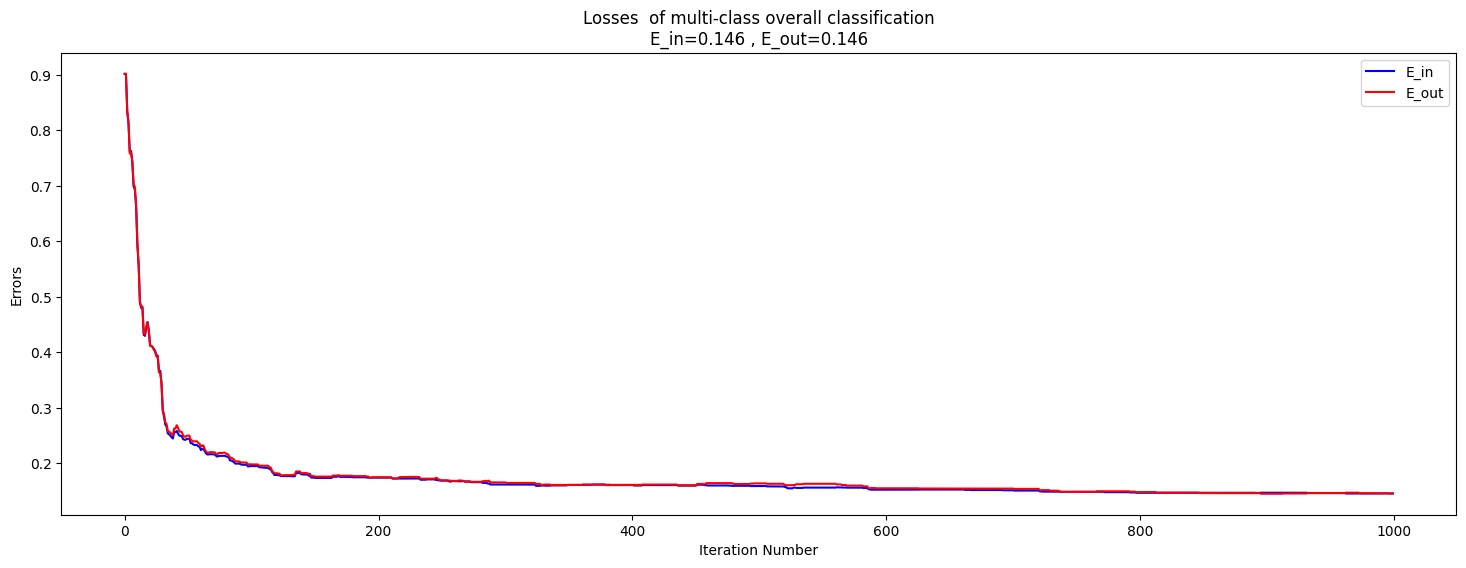

In [ ]:
# Plotting the losses on the same graphs
plt.figure(figsize=(18, 6))
plt.plot(E_in_m_overall, label='E_in', color='blue')  # Plot E_in's second column
plt.plot(E_out_m_overall, label='E_out', color='red')  # Plot E_out's second column

# Set plot labels and title
plt.xlabel('Iteration Number')
plt.ylabel('Errors')
plt.title(f'Losses  of multi-class overall classification\nE_in={E_in_m_overall[-1]:.3f} , E_out={E_out_m_overall[-1]:.3f}')
plt.legend()  # Show legend
plt.show()

  
####A2. Compute the confusion matrix for the multi-class classification problem on the test data and determine the accuracy (ACC).


A2. - Summary and Conclusions

The confusion matrix reflects the performance of the multiclass classification on the test data.

The diagonal of the matrix shows the large amount of hits (the correct classifications). The accuracy level is 85%. It is also evident that there are pairs of digits that the model has difficulty distinguishing, probably due to the similarity between them.

To identify pairs of digits that the model has trouble distinguishing between them,  I summed up the terms above and below the diagonal of the confusion matrix

The pairs that the model has difficulty distinguishing with over 100 incorrect classifications: (3,5), (8,5), (9,4), (9,7)

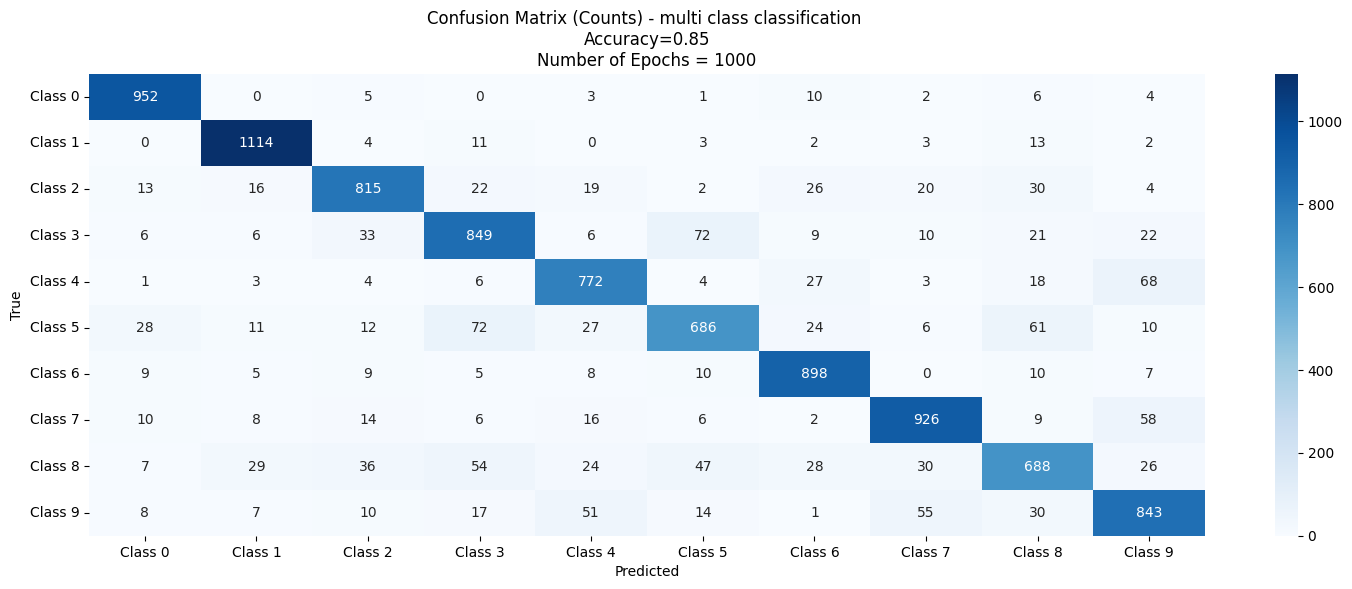

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate test prediction
y_pred = perceptron.predict(X_test_flattened)
y_true = labels_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate metrics: Accuracy, TPR, TNR
total = np.sum(conf_matrix)
accuracy = np.trace(conf_matrix) / float(total) # ACC = (TP + TN) / (TP + TN + FP + FN)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'])
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix (Counts)')
plt.title(f'Confusion Matrix (Counts) - multi class classification \nAccuracy={accuracy:.2f}\nNumber of Epochs = {num_epochs}')
# plt.title(f'Confusion Matrix (Counts) for Digit {digit}\nAccuracy={accuracy:.2f}, TPR={tpr:.2f}, TNR={tnr:.2f}')
plt.show()

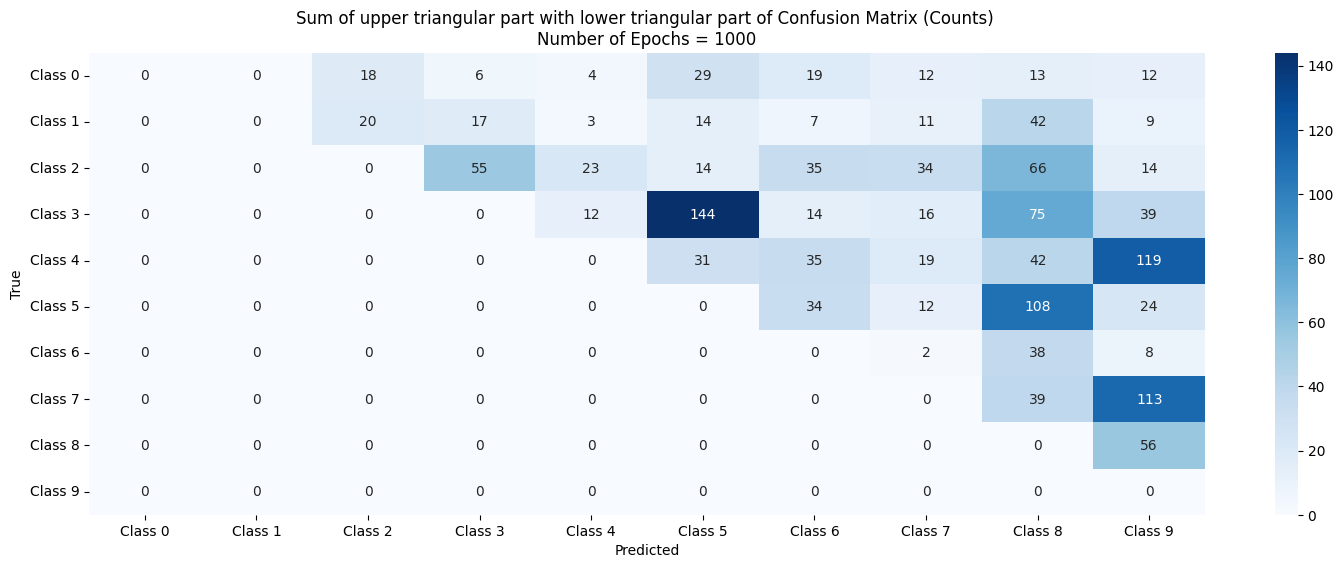

In [ ]:
# Summarize upper triangular part with lower triangular part
result = np.triu(conf_matrix) + np.transpose(np.tril(conf_matrix, k=-1))
# Set diagonal elements to zero
np.fill_diagonal(result, 0)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(result, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Sum of upper triangular part with lower triangular part of Confusion Matrix (Counts) \nNumber of Epochs = {num_epochs}')
plt.show()



####A3. Generate the table of confusion for each digit, and calculate the sensitivity (True Positive Rate, TPR) for each class.
The confusion matrix reflects the performance of the multiclass classification for each digit on the test data.

 A3. - Summary and Conclusions

 1) The  multi-calssifier gives good classification results to distinguish between digit

2) For each of the digits the accuracy index (ACC) ,sesitivity (TPR) and selectivity (TNR) level of the test data are very high and and for the most digits are above 95%.

3) The digits for which the model worked less well compared to the others are: 2,3,9,4 with a selectivity (TPR) level of around  80%-85% and 5,8 with a TPR of around 70%. It is possible that if we had increased the iterations in the training the value would have improved.

4) For each digit I calculated the loss function as a function of iteration number on the training data and the test data and separately on the binary classifier and the multi-class classifier.
as you can see
- There is decreasing in loss level over time
- For both classifiers, the loss level of the training and the test data are similar
- The binary classifier is better for diagnosing a individual digits than the multiple classifier. Apparently the multiple classifier has difficulty choosing the best prediction for pairs of digits that are visually similar (as mentioned in previous sections)
- The loss function of the binary classifier is decreasing or static in all domains of the definition, while that of the multi-class classifier has occasional increases. This is not surprising since, by design, the algorithm, according to the POCKET algorithm, keeps the best weights obtained so far by the binary classifier for each digit independently. Not so for the multi-class classifier and nevertheless, a nice progress towards convergence is evident, which indicates a good selection rule for determining the classification.


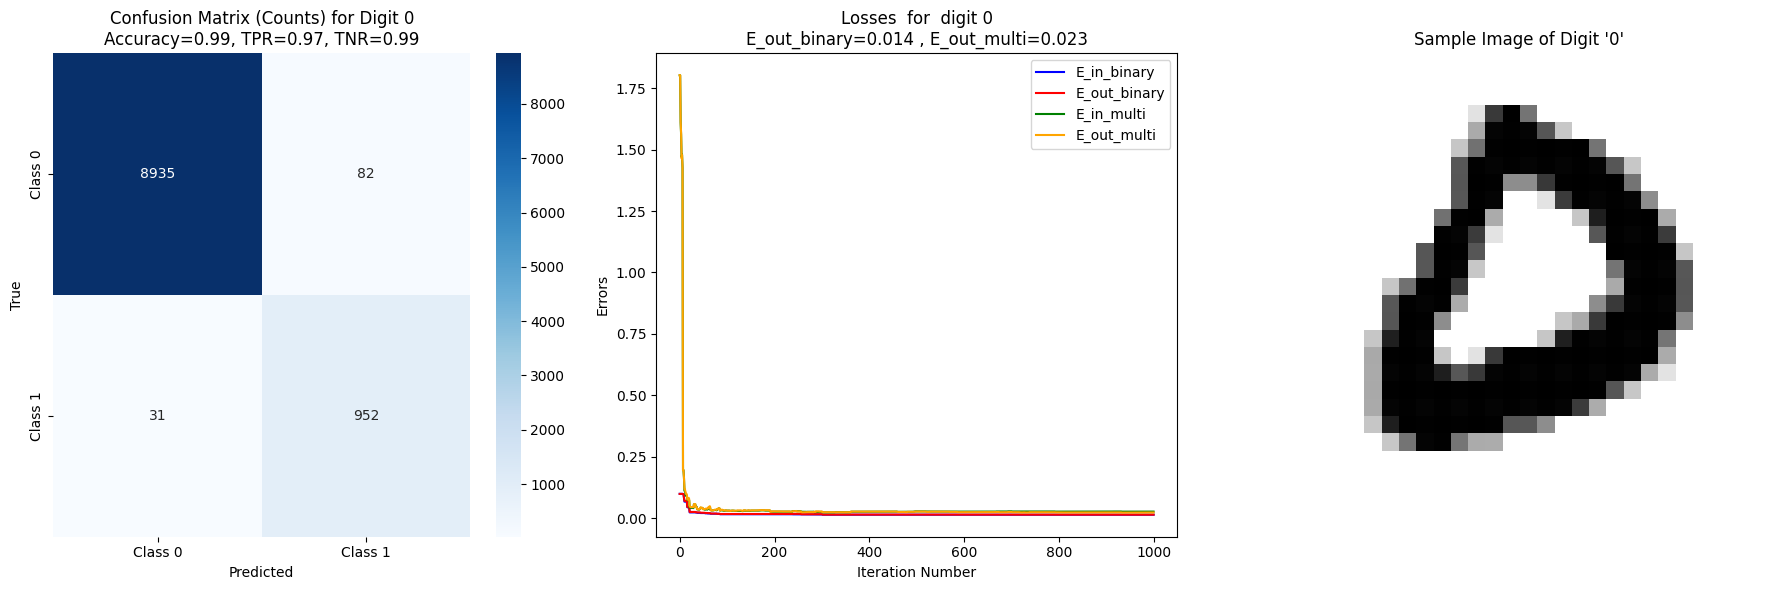

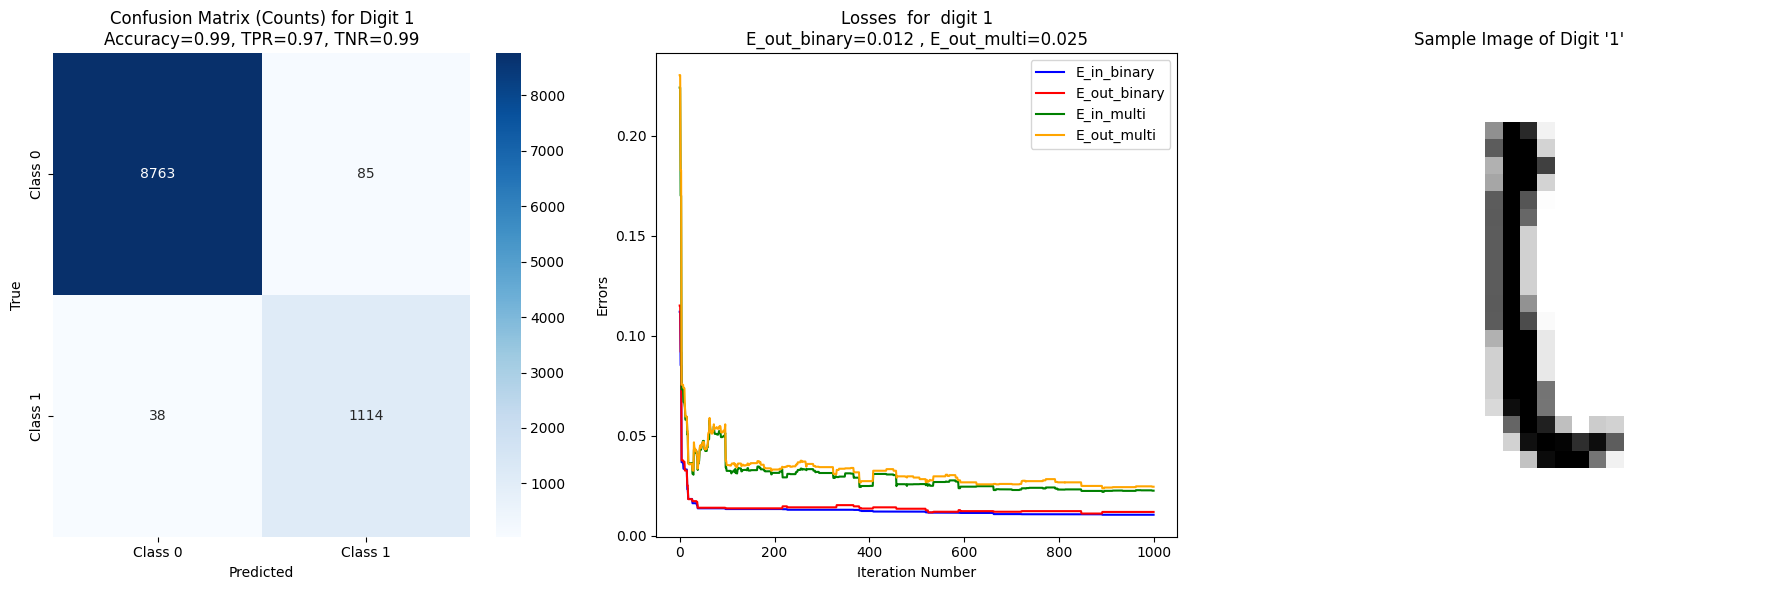

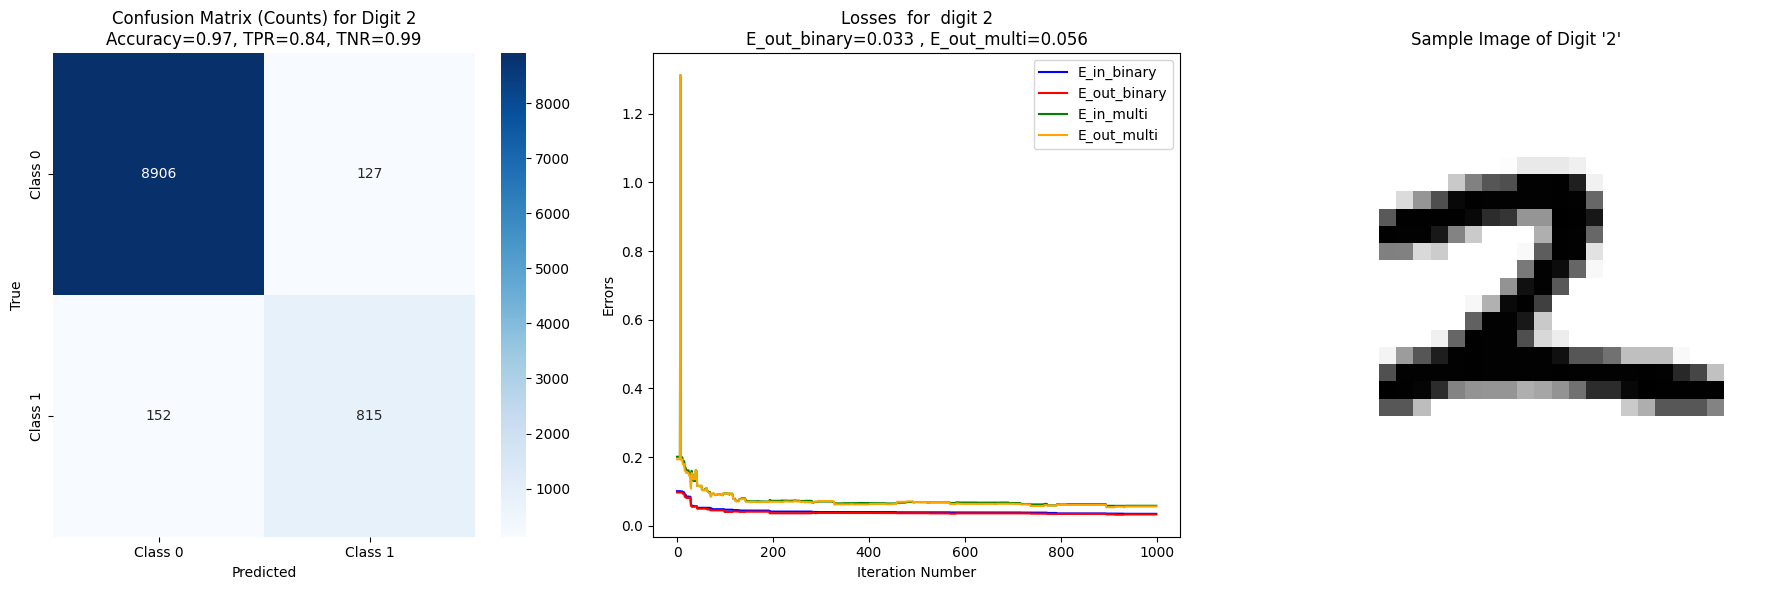

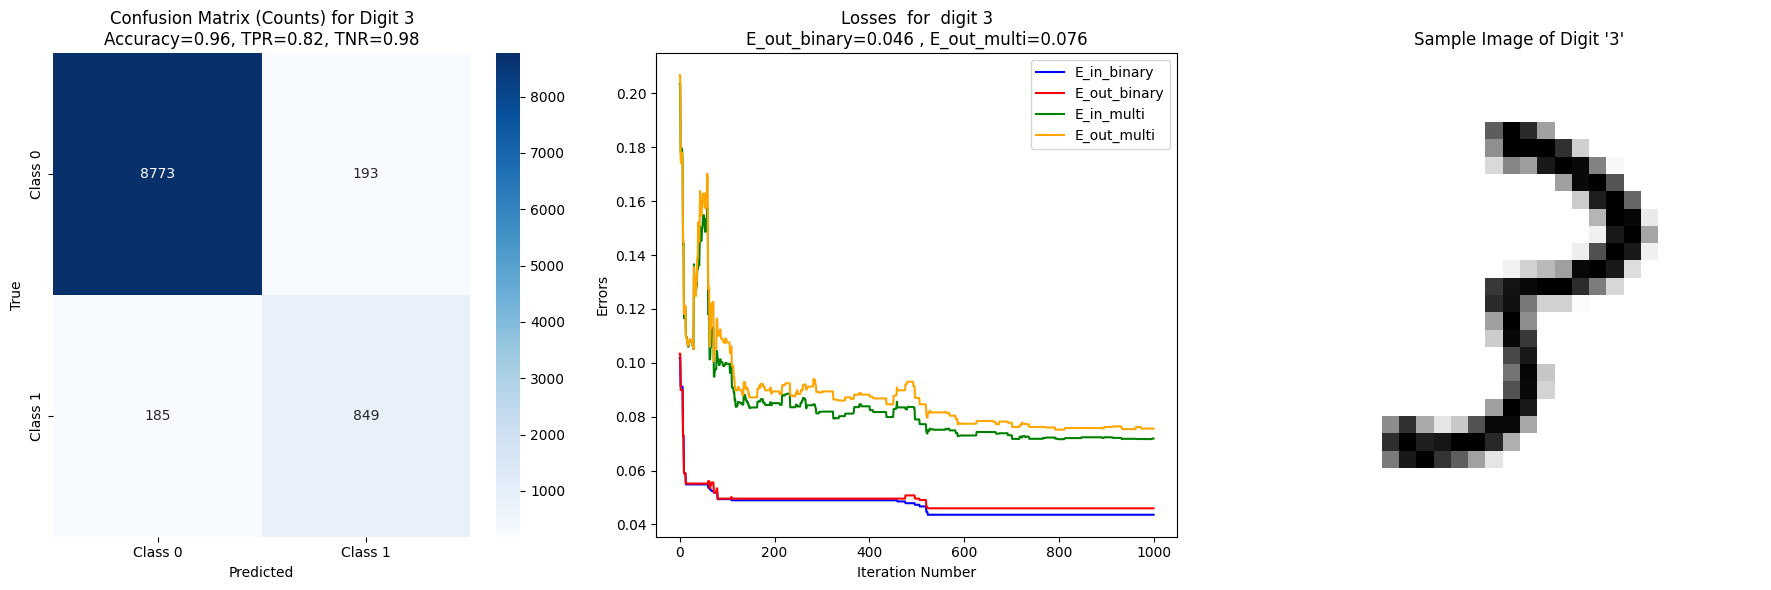

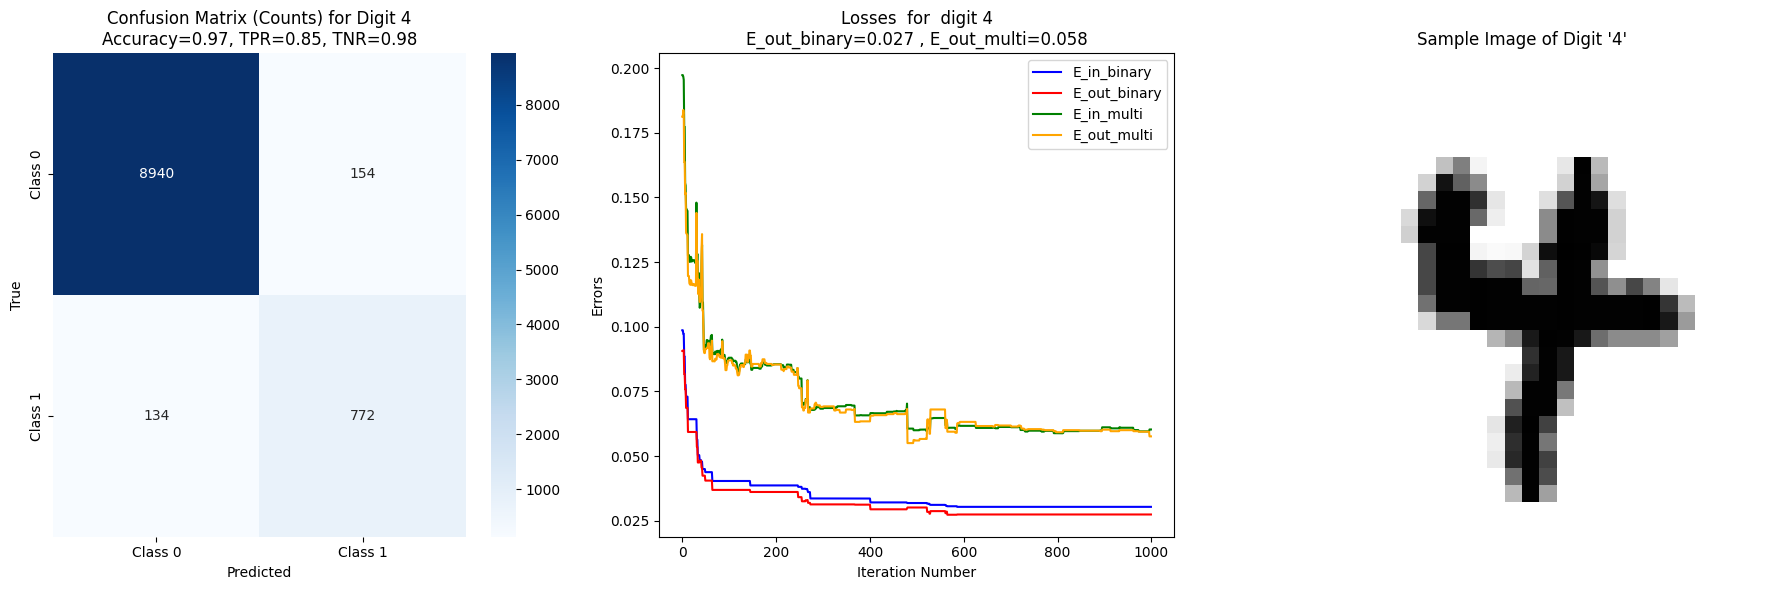

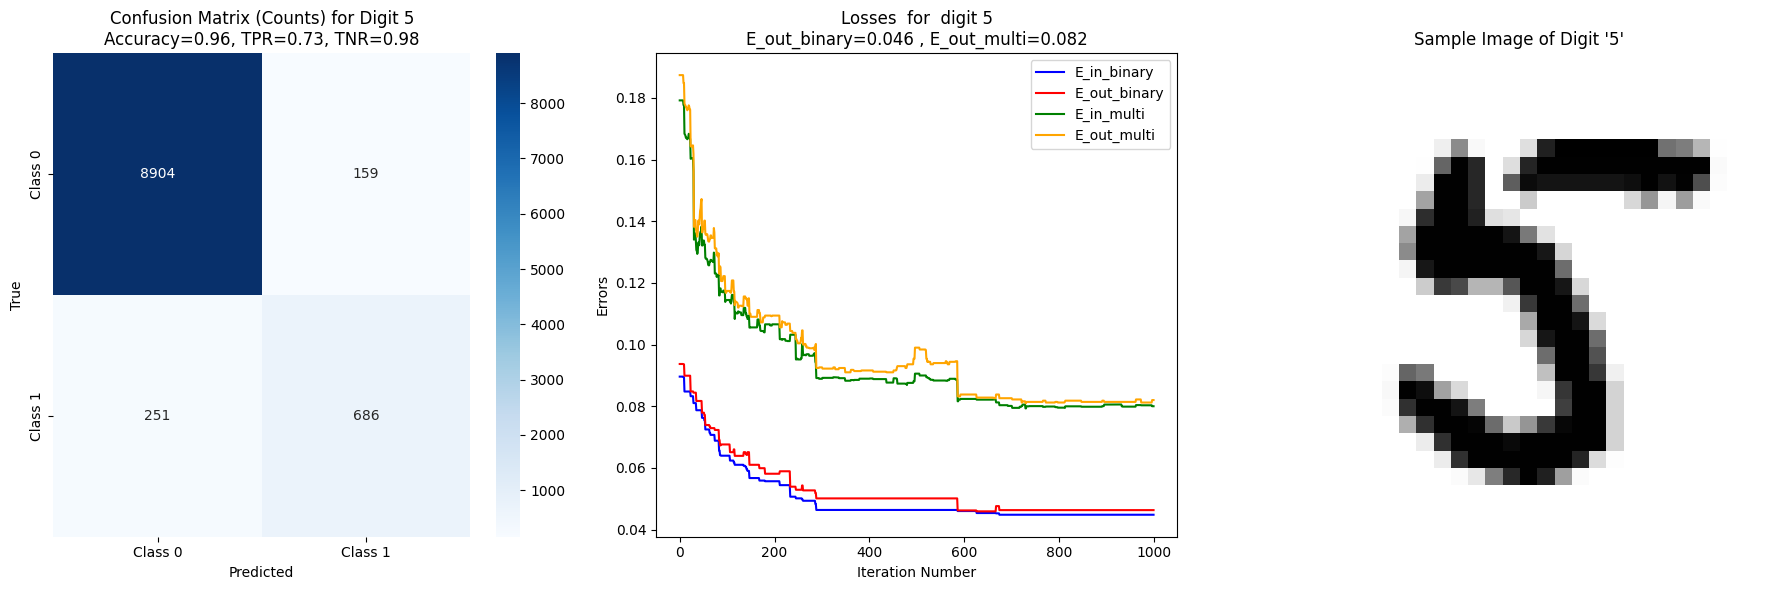

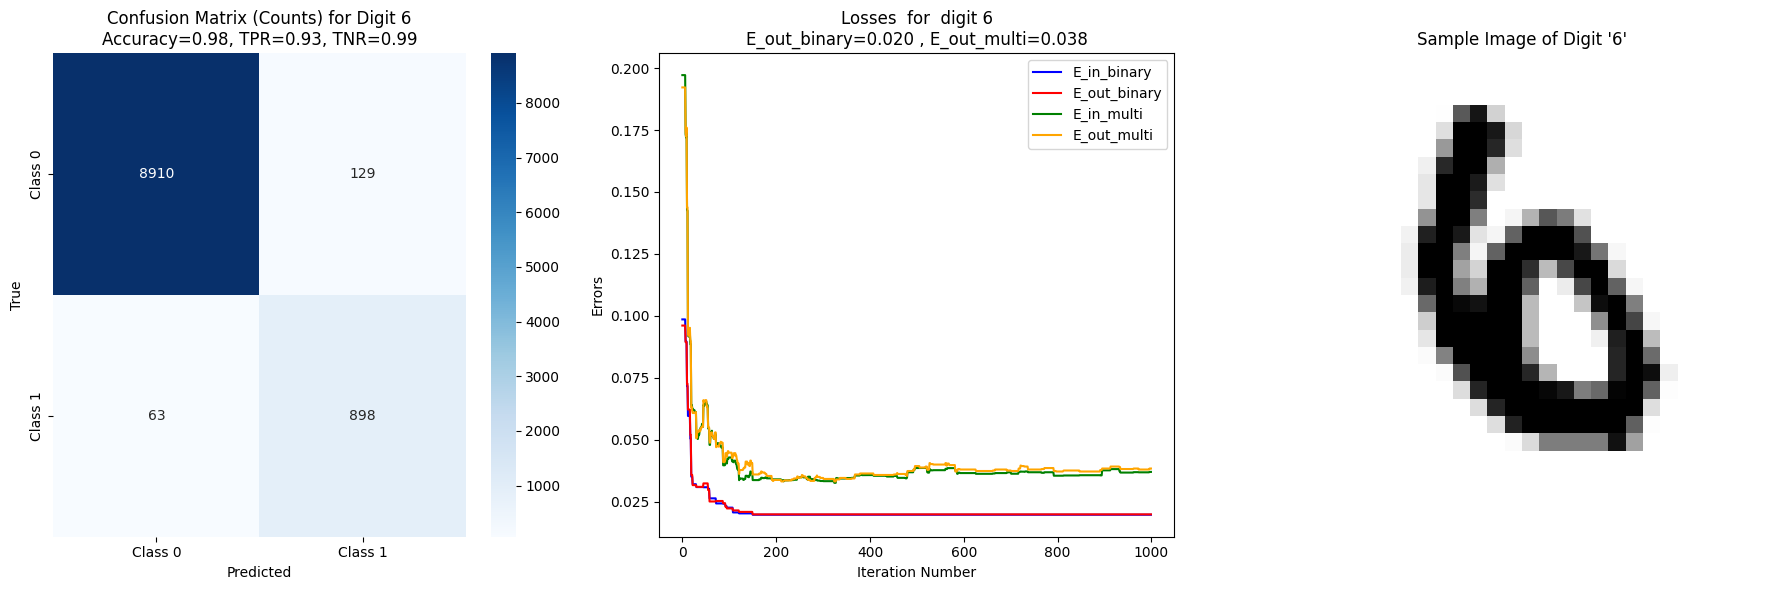

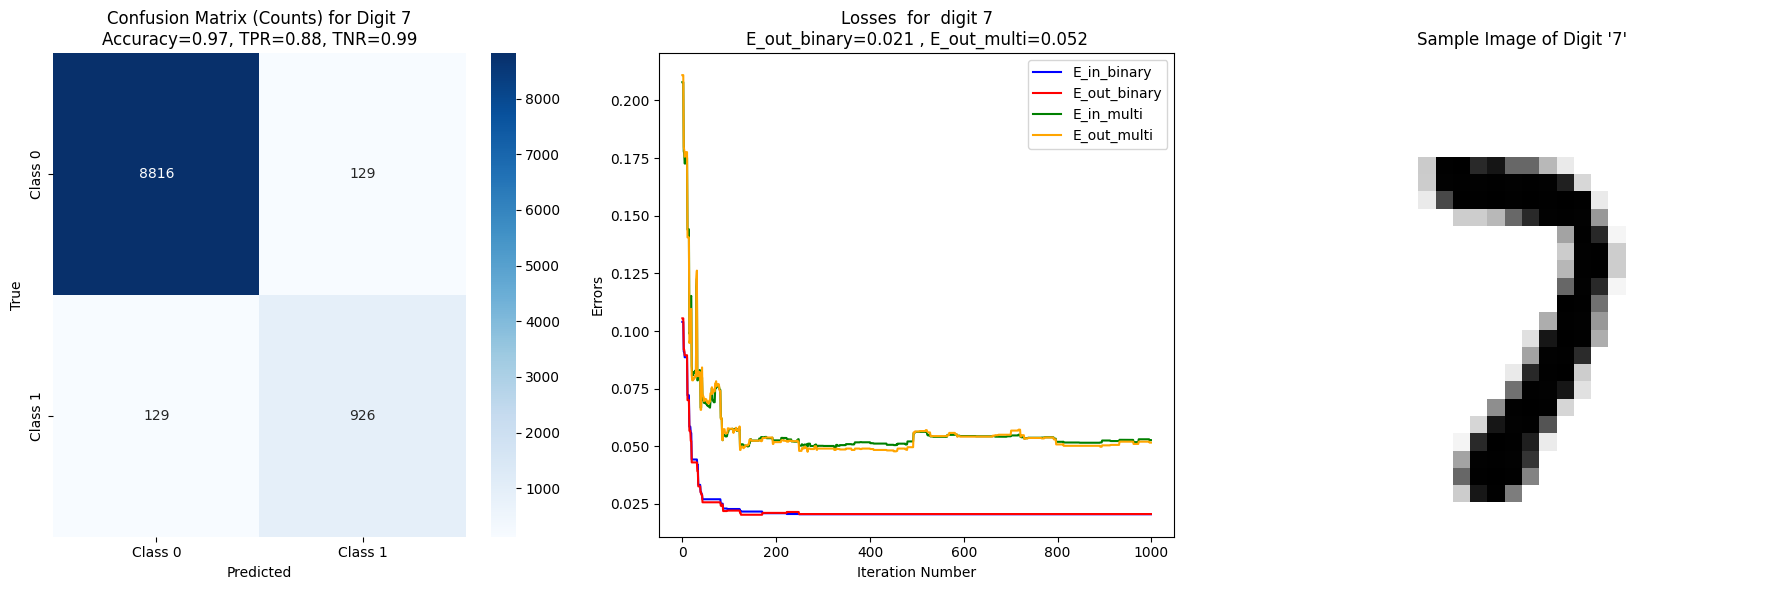

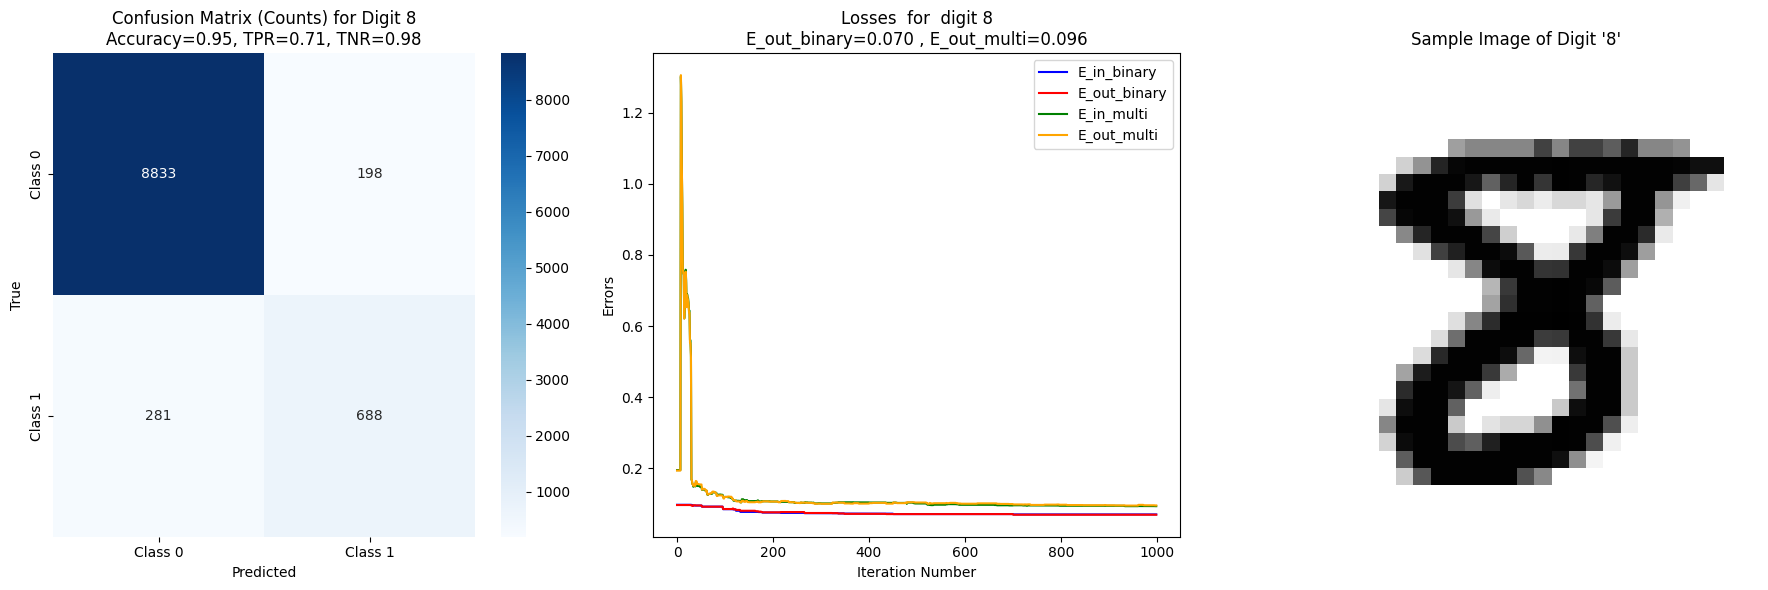

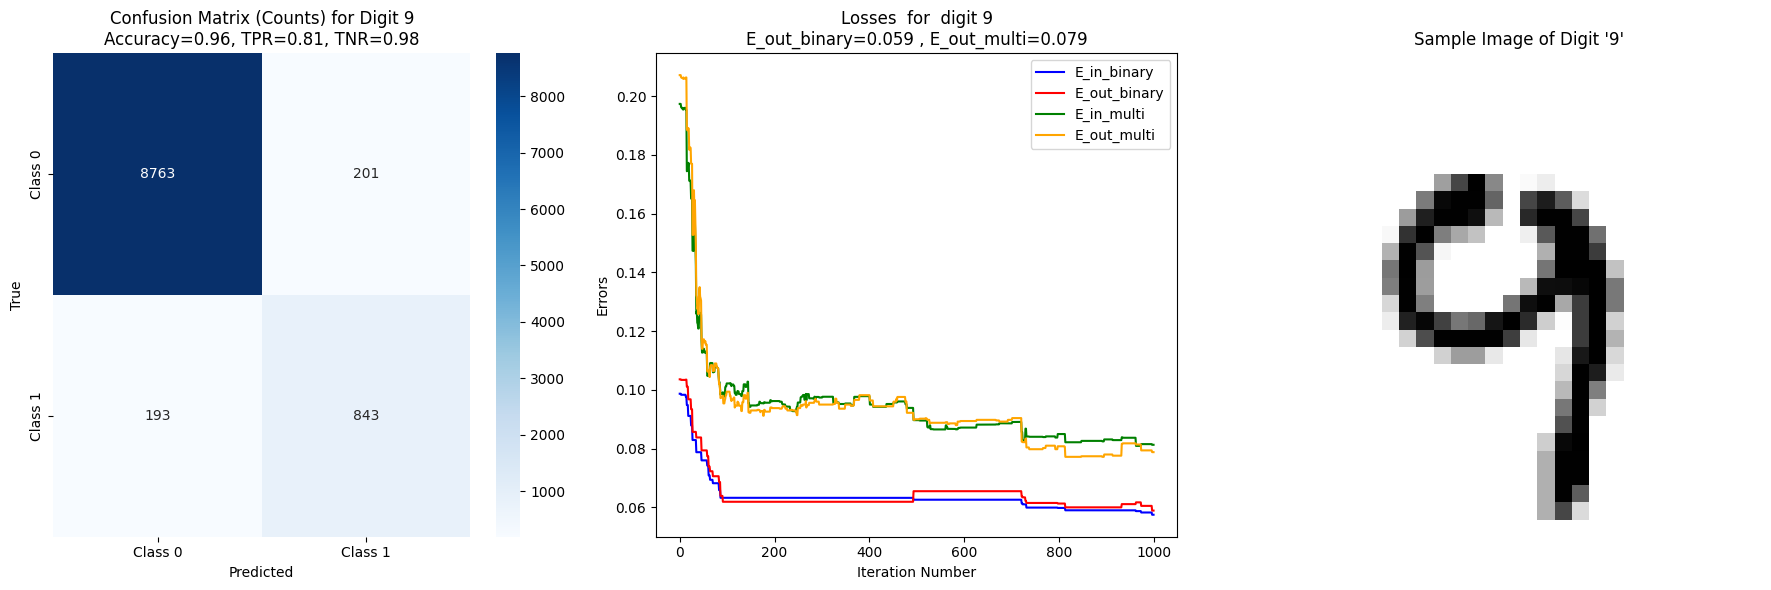

In [ ]:
def model_evaluation_per_digit(X_test, y_test, num_classes=10 ):

      for digit in range(0, num_classes):
        # Create confusion matrix
        conf_matrix = confusion_matrix(y_true[:, digit], y_pred[:, digit])

        # Calculate metrics: Accuracy, TPR, TNR
        total = np.sum(conf_matrix)
        accuracy = np.trace(conf_matrix) / float(total) # ACC = (TP + TN) / (TP + TN + FP + FN)
        tpr = conf_matrix[1, 1] / float(np.sum(conf_matrix[1, :])) # TPR = TP / (TP + FN)
        tnr = conf_matrix[0, 0] / float(np.sum(conf_matrix[0, :])) # TNR = TNR = TN / (TN + FP)

        # Plot side by side
        plt.figure(figsize=(18, 6))  # Adjust figsize as needed

        # Plot confusion matrix using seaborn heatmap
        plt.subplot(1, 3, 1)  # Adjust the number of subplots as needed (1 row, 3 columns)
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        #plt.title('Confusion Matrix (Counts)')
        plt.title(f'Confusion Matrix (Counts) for Digit {digit}\nAccuracy={accuracy:.2f}, TPR={tpr:.2f}, TNR={tnr:.2f}\nNumber of Epochs = {num_epochs}')
        #plt.show()

        # Performance Visualization: Visualize training and test losses on the same graph as a function of the iteration index
        plt.subplot(1, 3, 2)  # Adjust the number of subplots as needed (1 row, 3 columns)

        # Plotting the losses on the same graphs
        plt.plot(E_in_b_per_digit[:, digit], label='E_in_binary', color='blue')
        plt.plot(E_out_b_per_digit[:, digit ], label='E_out_binary', color='red')
        plt.plot(E_in_m_per_digit[:, digit ], label='E_in_multi', color='green')
        plt.plot(E_out_m_per_digit[:, digit ], label='E_out_multi', color='orange')

        # Set plot labels and title
        plt.xlabel('Iteration Number')
        plt.ylabel('Errors')
        plt.title(f'Losses  for  digit {digit}\nE_out_binary={E_out_b_per_digit[-1,digit]:.3f} , E_out_multi={E_out_m_per_digit[-1,digit]:.3f}')
        plt.legend()  # Show legend
        #plt.show()

        # Plotting a sample image
        y = one_hot_labels_test
        x = X_test_flattened

        # Find the first index of digit '1'
        digit_index = np.where(y[:,digit] >0)[0][0] #First index list of misclassified instances
        #print(digit_index)

        # Get the image data of the first occurrence of digit '1'
        image = x[digit_index,1:785].reshape(28, 28)  # Reshape to 28x28 pixels

        plt.subplot(1, 3, 3)  # Adjust the number of subplots as needed (1 row, 3 columns)
        # Display the image

        plt.imshow(image, cmap='binary')
        plt.axis('off')  # Hide axis labels and ticks
        plt.title(f"Sample Image of Digit '{digit}'")

        plt.tight_layout()
        plt.show()


from sklearn.metrics import confusion_matrix

# Calculate test prediction
y_pred_multi = perceptron.predict(X_test_flattened)
y_true = one_hot_labels_test

# Transform to y_pred binary matrix
num_samples = len(y_pred_multi)
num_classes = 10
y_pred = np.zeros((num_samples, num_classes))
y_pred[np.arange(num_samples), y_pred_multi] = 1

model_evaluation_per_digit(X_test_flattened, one_hot_labels_test, num_classes=10 )

####A4. Provide a comprehensive discussion of your results, considering the model's overall performance and its effectiveness in distinguishing individual digits.

In conclusion, The accuracy level is 85%.
It is possible that training on more iterations would have slightly improved the performance. We note that if a mistake has a high price, the classification must be realized with an algorithm that will make it possible to obtain probabilities for a correct prediction. Because the algorithm has problems in identifying a number of digits in relation to others.

See above for details .